# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:17:48.979167: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:17:52.091800
2025-04-14 19:17:52.091800


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:17:46"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

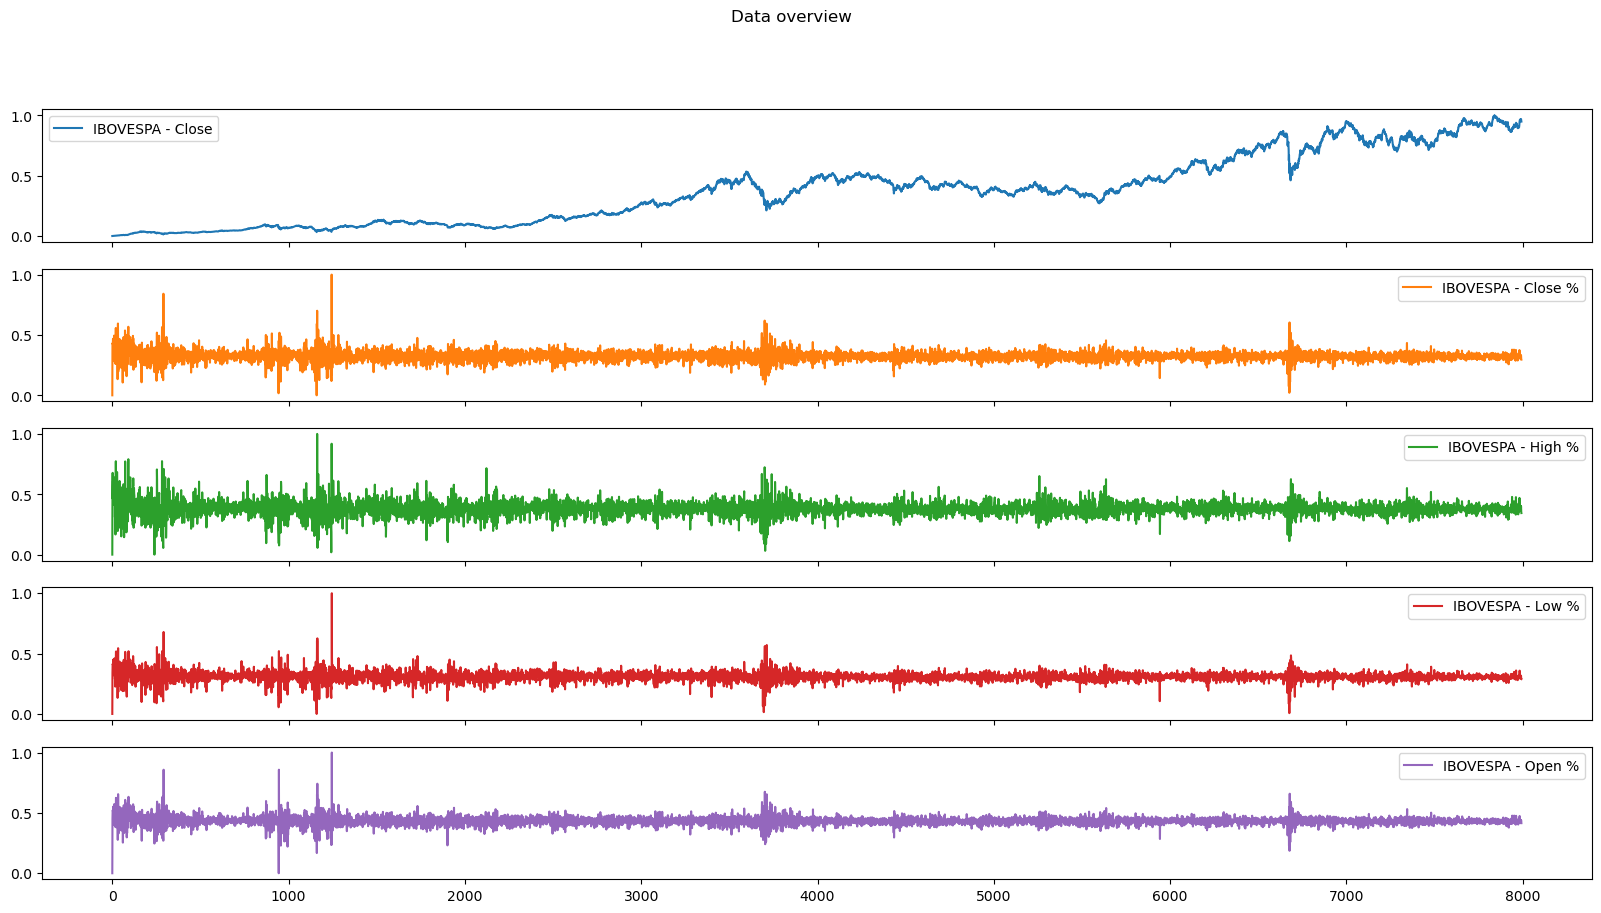

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

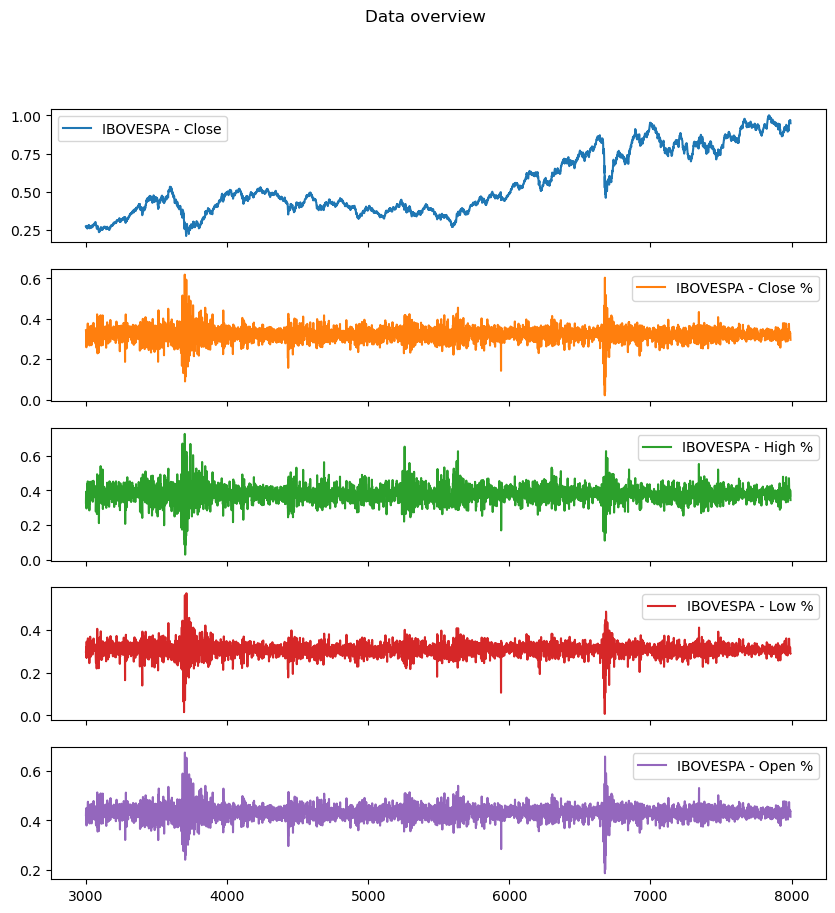

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

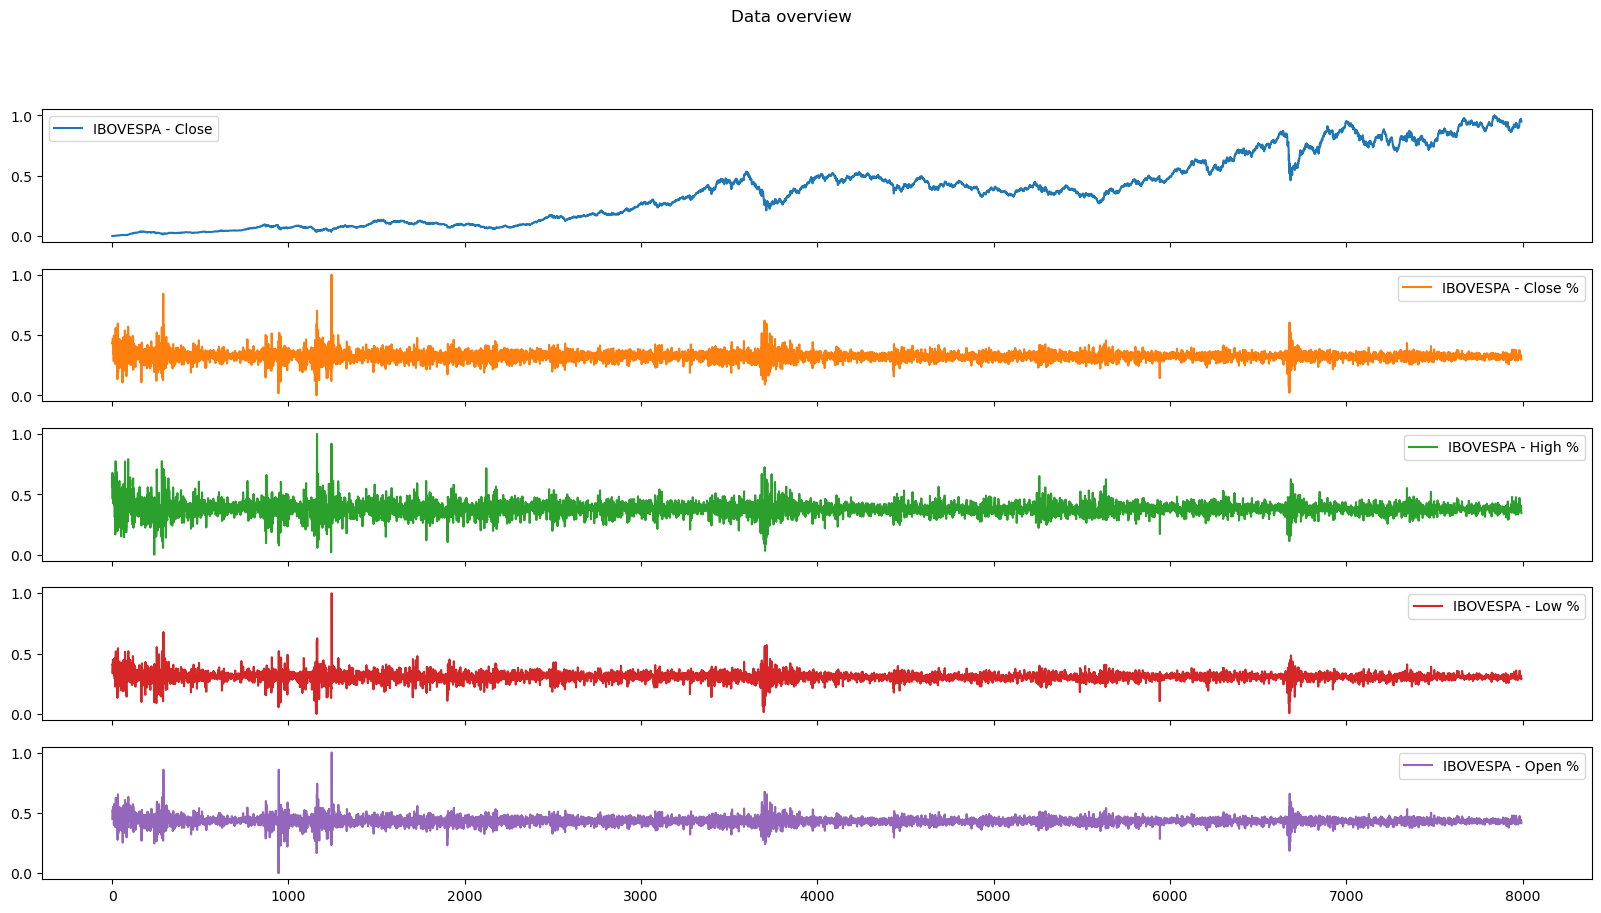

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

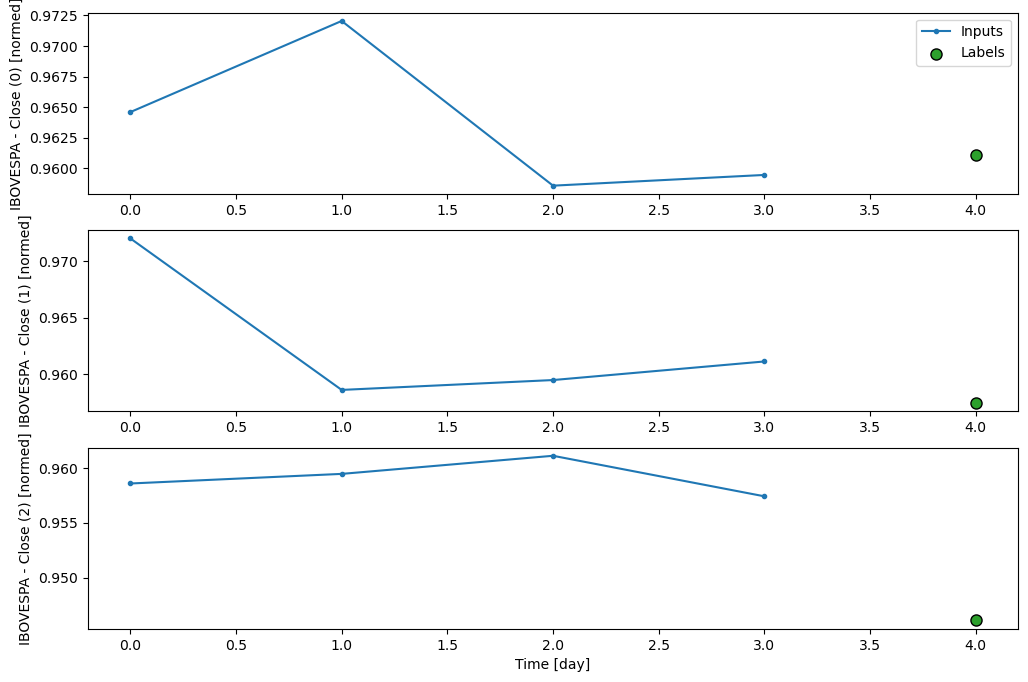

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

5

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:27 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 170.0379 - mean_squared_error: 4.2432e-04 - root_mean_squared_error: 0.0197 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 136.0667 - mean_squared_error: 3.8787e-04 - root_mean_squared_error: 0.0192

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 111.5623 - mean_squared_error: 3.3199e-04 - root_mean_squared_error: 0.0177

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 95.8625 - mean_squared_error: 3.0260e-04 - root_mean_squared_error: 0.0170 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 86.3992 - mean_squared_error: 2.9027e-04 - root_mean_squared_error: 0.0167

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.3092 - mean_squared_error: 2.8769e-04 - root_mean_squared_error: 0.0167

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.9534 - mean_squared_error: 2.8717e-04 - root_mean_squared_error: 0.0167

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.8592 - mean_squared_error: 2.8682e-04 - root_mean_squared_error: 0.0167

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.1291 - mean_squared_error: 2.8678e-04 - root_mean_squared_error: 0.0167

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.6415 - mean_squared_error: 2.9440e-04 - root_mean_squared_error: 0.0170

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 57.9510 - mean_squared_error: 3.0235e-04 - root_mean_squared_error: 0.0172

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 55.5378 - mean_squared_error: 3.1014e-04 - root_mean_squared_error: 0.0174

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 53.1668 - mean_squared_error: 3.4054e-04 - root_mean_squared_error: 0.0181

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 51.0891 - mean_squared_error: 3.9237e-04 - root_mean_squared_error: 0.0192

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 49.3284 - mean_squared_error: 5.2724e-04 - root_mean_squared_error: 0.0212

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 47.9625 - mean_squared_error: 6.9948e-04 - root_mean_squared_error: 0.0234

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 46.5659 - mean_squared_error: 8.7927e-04 - root_mean_squared_error: 0.0256

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 45.4153 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274    

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 44.2307 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 43.2510 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 42.3350 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 41.4811 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 40.6878 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 39.9351 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 39.3036 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 38.6280 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 37.9117 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 37.3020 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 37.0070 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400 - val_loss: 0.1253 - val_mean_absolute_error: 0.1253 - val_mean_absolute_percentage_error: 13.4040 - val_mean_squared_error: 0.0170 - val_root_mean_squared_error: 0.1306


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7217 - mean_absolute_error: 0.7217 - mean_absolute_percentage_error: 31154.6699 - mean_squared_error: 0.5209 - root_mean_squared_error: 0.7217

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7006 - mean_absolute_error: 0.7006 - mean_absolute_percentage_error: 13814.3203 - mean_squared_error: 0.4919 - root_mean_squared_error: 0.7011 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6584 - mean_absolute_error: 0.6584 - mean_absolute_percentage_error: 9873.1318 - mean_squared_error: 0.4407 - root_mean_squared_error: 0.6622 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5871 - mean_absolute_error: 0.5871 - mean_absolute_percentage_error: 7687.1943 - mean_squared_error: 0.3784 - root_mean_squared_error: 0.6094

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5266 - mean_absolute_error: 0.5266 - mean_absolute_percentage_error: 6479.7339 - mean_squared_error: 0.3333 - root_mean_squared_error: 0.5676

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4715 - mean_absolute_error: 0.4715 - mean_absolute_percentage_error: 5543.1924 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5287

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4321 - mean_absolute_error: 0.4321 - mean_absolute_percentage_error: 4932.2788 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.5001

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3955 - mean_absolute_error: 0.3955 - mean_absolute_percentage_error: 4402.3467 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4729

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 4027.4937 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4522

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3426 - mean_absolute_error: 0.3426 - mean_absolute_percentage_error: 3682.6345 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4319

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3229 - mean_absolute_error: 0.3229 - mean_absolute_percentage_error: 3426.8696 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4162

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 3182.5220 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4004

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 2995.6338 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3878

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 2812.5005 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3751

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 2652.6724 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3638

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 2511.8611 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3535

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 2399.8906 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3452

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 2286.4443 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3365

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 2184.2651 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3285

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 2101.5444 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3218

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 2016.3815 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3149

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 1938.5134 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3084

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 1867.0227 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3023

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 1801.1428 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.2966

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 1740.2073 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2914

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 1689.7507 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2870

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 1636.7087 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2824

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 1597.9209 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2790


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 1561.1162 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2757 - val_loss: 0.1037 - val_mean_absolute_error: 0.1037 - val_mean_absolute_percentage_error: 11.0738 - val_mean_squared_error: 0.0120 - val_root_mean_squared_error: 0.1094


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6454 - mean_absolute_error: 0.6454 - mean_absolute_percentage_error: 27867.5117 - mean_squared_error: 0.4165 - root_mean_squared_error: 0.6454

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6333 - mean_absolute_error: 0.6333 - mean_absolute_percentage_error: 12380.3008 - mean_squared_error: 0.4013 - root_mean_squared_error: 0.6334 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6091 - mean_absolute_error: 0.6091 - mean_absolute_percentage_error: 8908.2539 - mean_squared_error: 0.3736 - root_mean_squared_error: 0.6106 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5606 - mean_absolute_error: 0.5606 - mean_absolute_percentage_error: 6994.6855 - mean_squared_error: 0.3308 - root_mean_squared_error: 0.5720

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5102 - mean_absolute_error: 0.5102 - mean_absolute_percentage_error: 5822.8955 - mean_squared_error: 0.2923 - root_mean_squared_error: 0.5343

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4657 - mean_absolute_error: 0.4657 - mean_absolute_percentage_error: 5020.8208 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.5017

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4278 - mean_absolute_error: 0.4278 - mean_absolute_percentage_error: 4432.3325 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4740

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 3979.6692 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4504

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 3655.8586 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4321

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3521 - mean_absolute_error: 0.3521 - mean_absolute_percentage_error: 3417.2266 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4179

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 3157.0864 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.4016

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 2960.2671 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3886

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 2788.9797 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3769

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 2620.8301 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3649

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 2473.8259 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3541

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 2357.8013 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3454

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 2240.9116 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3364

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 2136.2109 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3281

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 2041.8123 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3205

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1965.3281 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3141

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1894.9316 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.3081

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1829.9030 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.3025

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 1762.4119 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2966

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1700.2112 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.2910

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 1642.6753 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2857

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 1589.2904 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2808

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 1539.6083 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2762

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 1493.2360 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2718


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 1464.0060 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2690 - val_loss: 0.0523 - val_mean_absolute_error: 0.0523 - val_mean_absolute_percentage_error: 5.5683 - val_mean_squared_error: 0.0033 - val_root_mean_squared_error: 0.0575


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.4351 - mean_absolute_error: 0.4351 - mean_absolute_percentage_error: 18820.7578 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4352

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4151 - mean_absolute_error: 0.4151 - mean_absolute_percentage_error: 7873.7642 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.4158  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3685 - mean_absolute_error: 0.3685 - mean_absolute_percentage_error: 5512.3281 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3780

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 4444.9961 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3477

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 3689.2122 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3205

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 3274.7812 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.3031

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 2994.4995 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2903

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 2763.2271 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2790

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 2510.5493 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2659

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 2304.6086 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2545

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 2113.6426 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2433

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 1971.1772 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2346

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 1834.4152 - mean_squared_error: 0.0585 - root_mean_squared_error: 0.2259

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 1729.3751 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2189

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 1626.0627 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2119

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 1545.0681 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2062

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 1464.0071 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2003

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 1399.4565 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1955

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 1333.9611 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1905

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 1281.1702 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1864

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 1227.0278 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1821

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1177.7032 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1781

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 1137.3867 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1748

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 1095.5157 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1712

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 1061.0457 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1683

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 1025.0138 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1651

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 995.1737 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1625 

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 963.8077 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1597

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 937.6973 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1574


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 919.1201 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1557 - val_loss: 0.0405 - val_mean_absolute_error: 0.0405 - val_mean_absolute_percentage_error: 4.3131 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0439


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 6802.6904 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1566

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 2685.7639 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1257 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1825.3503 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1069

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 1420.1667 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0954

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 1198.4673 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0880

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 1026.3555 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0815

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 913.7205 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0768 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 815.8636 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0725

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 738.7839 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0688

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 676.3077 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0657

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 629.8381 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 585.3371 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0608

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 547.2781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 514.3170 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 485.4704 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 459.9848 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 442.1128 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 425.7090 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0513

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 406.4901 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0500

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 390.9408 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0490

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 374.9410 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 361.8814 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 348.3343 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 337.1942 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0452

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 325.5612 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0444

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 315.9383 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0437

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 305.8345 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0430

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 297.4321 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0424


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 290.4881 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0419 - val_loss: 0.0412 - val_mean_absolute_error: 0.0412 - val_mean_absolute_percentage_error: 4.3971 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0441


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 4444.5698 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1027

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 1719.2036 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 1163.0042 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0659

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 901.5618 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0584 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 744.4655 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 638.3752 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 561.3594 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 502.5683 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 460.7035 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 421.9745 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 393.1392 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 365.5048 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 344.3126 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 325.6760 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 307.2216 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 292.6687 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 278.0232 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 264.9162 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 253.1089 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 242.4076 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 232.6590 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 223.7377 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 215.5383 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 207.9740 - mean_squared_error: 9.9544e-04 - root_mean_squared_error: 0.0280

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 200.9722 - mean_squared_error: 9.6738e-04 - root_mean_squared_error: 0.0276

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 194.4718 - mean_squared_error: 9.4185e-04 - root_mean_squared_error: 0.0272

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 189.7272 - mean_squared_error: 9.2330e-04 - root_mean_squared_error: 0.0270

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 185.2311 - mean_squared_error: 9.0582e-04 - root_mean_squared_error: 0.0267


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 182.7669 - mean_squared_error: 8.9625e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0690 - val_mean_squared_error: 1.5827e-04 - val_root_mean_squared_error: 0.0126


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 3507.1670 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0811

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 1340.3689 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 904.5698 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0502 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 700.4075 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 578.2048 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 495.9579 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 442.0638 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 399.7842 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 361.8325 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 334.2398 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 308.2937 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 288.7078 - mean_squared_error: 9.6500e-04 - root_mean_squared_error: 0.0281

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 269.7217 - mean_squared_error: 9.0546e-04 - root_mean_squared_error: 0.0271

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 255.0213 - mean_squared_error: 8.5927e-04 - root_mean_squared_error: 0.0263

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 240.4697 - mean_squared_error: 8.1379e-04 - root_mean_squared_error: 0.0255

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 228.9931 - mean_squared_error: 7.7788e-04 - root_mean_squared_error: 0.0249

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 217.4455 - mean_squared_error: 7.4166e-04 - root_mean_squared_error: 0.0242

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 208.2086 - mean_squared_error: 7.1265e-04 - root_mean_squared_error: 0.0237

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 199.7985 - mean_squared_error: 6.8618e-04 - root_mean_squared_error: 0.0232

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 191.1899 - mean_squared_error: 6.5903e-04 - root_mean_squared_error: 0.0227

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 185.0410 - mean_squared_error: 6.3970e-04 - root_mean_squared_error: 0.0223

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 180.1083 - mean_squared_error: 6.2420e-04 - root_mean_squared_error: 0.0220

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 176.2146 - mean_squared_error: 6.1198e-04 - root_mean_squared_error: 0.0218

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 173.2310 - mean_squared_error: 6.0262e-04 - root_mean_squared_error: 0.0216

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 168.9587 - mean_squared_error: 5.8920e-04 - root_mean_squared_error: 0.0214

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 164.2587 - mean_squared_error: 5.7444e-04 - root_mean_squared_error: 0.0211

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 160.4534 - mean_squared_error: 5.6252e-04 - root_mean_squared_error: 0.0208

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 158.0226 - mean_squared_error: 5.5497e-04 - root_mean_squared_error: 0.0207

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 155.0967 - mean_squared_error: 5.4614e-04 - root_mean_squared_error: 0.0205

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 151.1959 - mean_squared_error: 5.3459e-04 - root_mean_squared_error: 0.0203

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 147.5056 - mean_squared_error: 5.2383e-04 - root_mean_squared_error: 0.0201

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 144.0090 - mean_squared_error: 5.1382e-04 - root_mean_squared_error: 0.0199


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 142.0927 - mean_squared_error: 5.0837e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2374 - val_mean_squared_error: 2.0568e-04 - val_root_mean_squared_error: 0.0143


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 3107.2112 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0717

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 1259.4714 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 866.9959 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 719.0133 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 593.5182 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 509.4603 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 442.2881 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 397.2806 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 361.4632 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 332.2012 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 307.7899 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 287.0729 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 269.2421 - mean_squared_error: 9.5703e-04 - root_mean_squared_error: 0.0290

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 253.7151 - mean_squared_error: 9.0854e-04 - root_mean_squared_error: 0.0282

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 240.0595 - mean_squared_error: 8.6556e-04 - root_mean_squared_error: 0.0274

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 226.5293 - mean_squared_error: 8.2294e-04 - root_mean_squared_error: 0.0267

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 215.8500 - mean_squared_error: 7.8913e-04 - root_mean_squared_error: 0.0261

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 206.2313 - mean_squared_error: 7.5844e-04 - root_mean_squared_error: 0.0255

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 199.6187 - mean_squared_error: 7.3721e-04 - root_mean_squared_error: 0.0251

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 193.4616 - mean_squared_error: 7.1743e-04 - root_mean_squared_error: 0.0247

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 186.7916 - mean_squared_error: 6.9600e-04 - root_mean_squared_error: 0.0243

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 184.0870 - mean_squared_error: 6.8728e-04 - root_mean_squared_error: 0.0241

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 180.6132 - mean_squared_error: 6.7605e-04 - root_mean_squared_error: 0.0239

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 178.1019 - mean_squared_error: 6.6791e-04 - root_mean_squared_error: 0.0237

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 176.4704 - mean_squared_error: 6.6262e-04 - root_mean_squared_error: 0.0236

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 174.8719 - mean_squared_error: 6.5744e-04 - root_mean_squared_error: 0.0235

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 172.5338 - mean_squared_error: 6.4985e-04 - root_mean_squared_error: 0.0234

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 171.0134 - mean_squared_error: 6.4491e-04 - root_mean_squared_error: 0.0233

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 167.3404 - mean_squared_error: 6.3302e-04 - root_mean_squared_error: 0.0230

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 164.5263 - mean_squared_error: 6.2394e-04 - root_mean_squared_error: 0.0229

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 161.8157 - mean_squared_error: 6.1522e-04 - root_mean_squared_error: 0.0227

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 159.2026 - mean_squared_error: 6.0682e-04 - root_mean_squared_error: 0.0225

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 156.0649 - mean_squared_error: 5.9675e-04 - root_mean_squared_error: 0.0223

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 153.0619 - mean_squared_error: 5.8720e-04 - root_mean_squared_error: 0.0221

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 151.3210 - mean_squared_error: 5.8171e-04 - root_mean_squared_error: 0.0220

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 149.0674 - mean_squared_error: 5.7476e-04 - root_mean_squared_error: 0.0219

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 145.8253 - mean_squared_error: 5.6556e-04 - root_mean_squared_error: 0.0217

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 142.7375 - mean_squared_error: 5.5757e-04 - root_mean_squared_error: 0.0216

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 140.2747 - mean_squared_error: 5.5209e-04 - root_mean_squared_error: 0.0215

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 138.3718 - mean_squared_error: 5.4804e-04 - root_mean_squared_error: 0.0214

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 135.6230 - mean_squared_error: 5.4235e-04 - root_mean_squared_error: 0.0213


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 134.2947 - mean_squared_error: 5.3960e-04 - root_mean_squared_error: 0.0213 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0990 - val_mean_squared_error: 1.6224e-04 - val_root_mean_squared_error: 0.0127


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 3570.5601 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0823

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 1845.9944 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0704 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 1254.9755 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 984.3121 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 820.2931 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0514

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 708.4738 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0482

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 638.7253 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 603.9414 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 563.7918 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 513.7244 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 472.7038 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 438.3951 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 409.2324 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 384.1019 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 358.8059 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 342.8950 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 328.4816 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 317.8869 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 308.0264 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 296.6177 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 286.1105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 276.3993 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 269.1430 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 260.6499 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 252.7326 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 242.5038 - mean_squared_error: 9.6734e-04 - root_mean_squared_error: 0.0282

140/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 233.1517 - mean_squared_error: 9.3365e-04 - root_mean_squared_error: 0.0277

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 224.5651 - mean_squared_error: 9.0262e-04 - root_mean_squared_error: 0.0272

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 217.7435 - mean_squared_error: 8.7793e-04 - root_mean_squared_error: 0.0267

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 213.4452 - mean_squared_error: 8.6233e-04 - root_mean_squared_error: 0.0265

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 206.3586 - mean_squared_error: 8.3655e-04 - root_mean_squared_error: 0.0260

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 200.6860 - mean_squared_error: 8.1587e-04 - root_mean_squared_error: 0.0257

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 194.4889 - mean_squared_error: 7.9321e-04 - root_mean_squared_error: 0.0253

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 190.3153 - mean_squared_error: 7.7792e-04 - root_mean_squared_error: 0.0250

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 186.3349 - mean_squared_error: 7.6330e-04 - root_mean_squared_error: 0.0247

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 181.7943 - mean_squared_error: 7.4660e-04 - root_mean_squared_error: 0.0244

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 176.7962 - mean_squared_error: 7.2820e-04 - root_mean_squared_error: 0.0241

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 173.4077 - mean_squared_error: 7.1573e-04 - root_mean_squared_error: 0.0239

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 170.7983 - mean_squared_error: 7.0616e-04 - root_mean_squared_error: 0.0237

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 167.0433 - mean_squared_error: 6.9257e-04 - root_mean_squared_error: 0.0235

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 162.8861 - mean_squared_error: 6.7758e-04 - root_mean_squared_error: 0.0232

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 158.9512 - mean_squared_error: 6.6350e-04 - root_mean_squared_error: 0.0229

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 154.7030 - mean_squared_error: 6.4835e-04 - root_mean_squared_error: 0.0226


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 153.6809 - mean_squared_error: 6.4470e-04 - root_mean_squared_error: 0.0226 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8307 - val_mean_squared_error: 9.5698e-05 - val_root_mean_squared_error: 0.0098


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 2412.7642 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0559

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 1029.5443 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 702.5054 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 547.2189 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 453.8319 - mean_squared_error: 8.7354e-04 - root_mean_squared_error: 0.0278

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 424.0220 - mean_squared_error: 8.2273e-04 - root_mean_squared_error: 0.0269

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 369.2822 - mean_squared_error: 7.2873e-04 - root_mean_squared_error: 0.0252

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 328.6104 - mean_squared_error: 6.5876e-04 - root_mean_squared_error: 0.0239

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 296.9025 - mean_squared_error: 6.0318e-04 - root_mean_squared_error: 0.0227

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 278.1476 - mean_squared_error: 5.6967e-04 - root_mean_squared_error: 0.0220

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 258.8754 - mean_squared_error: 5.3472e-04 - root_mean_squared_error: 0.0213

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 247.6161 - mean_squared_error: 5.1408e-04 - root_mean_squared_error: 0.0208

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 239.8760 - mean_squared_error: 4.9980e-04 - root_mean_squared_error: 0.0205

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 232.6642 - mean_squared_error: 4.8641e-04 - root_mean_squared_error: 0.0202

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 223.7735 - mean_squared_error: 4.6981e-04 - root_mean_squared_error: 0.0198

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 208.0871 - mean_squared_error: 4.4023e-04 - root_mean_squared_error: 0.0191

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 193.1233 - mean_squared_error: 4.1167e-04 - root_mean_squared_error: 0.0184

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 180.3710 - mean_squared_error: 3.8719e-04 - root_mean_squared_error: 0.0178 

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 170.5080 - mean_squared_error: 3.6830e-04 - root_mean_squared_error: 0.0173

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 160.7559 - mean_squared_error: 3.5014e-04 - root_mean_squared_error: 0.0169

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 153.0806 - mean_squared_error: 3.3683e-04 - root_mean_squared_error: 0.0166

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 146.1824 - mean_squared_error: 3.2551e-04 - root_mean_squared_error: 0.0163

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 139.2079 - mean_squared_error: 3.1464e-04 - root_mean_squared_error: 0.0160

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 133.6015 - mean_squared_error: 3.0598e-04 - root_mean_squared_error: 0.0158

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 127.8648 - mean_squared_error: 2.9699e-04 - root_mean_squared_error: 0.0156

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 122.6504 - mean_squared_error: 2.8877e-04 - root_mean_squared_error: 0.0154

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 117.8888 - mean_squared_error: 2.8125e-04 - root_mean_squared_error: 0.0152

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 113.9899 - mean_squared_error: 2.7525e-04 - root_mean_squared_error: 0.0151

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 109.9349 - mean_squared_error: 2.6946e-04 - root_mean_squared_error: 0.0150

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 106.5911 - mean_squared_error: 2.6496e-04 - root_mean_squared_error: 0.0149

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 103.8457 - mean_squared_error: 2.6154e-04 - root_mean_squared_error: 0.0148

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 101.2532 - mean_squared_error: 2.5846e-04 - root_mean_squared_error: 0.0147

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 98.8001 - mean_squared_error: 2.5556e-04 - root_mean_squared_error: 0.0147 

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 97.1271 - mean_squared_error: 2.5362e-04 - root_mean_squared_error: 0.0146


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 94.8884 - mean_squared_error: 2.5102e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7394 - val_mean_squared_error: 7.2392e-05 - val_root_mean_squared_error: 0.0085


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 3571.9446 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0823

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 2027.5464 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0730 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 1314.9939 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 976.7479 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 789.6480 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 683.0814 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0456

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 593.3318 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 535.1127 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 481.5030 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 438.6497 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 403.5265 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 378.0745 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 352.5646 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 330.6101 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 311.4902 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 294.6719 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 283.8391 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 273.8540 - mean_squared_error: 9.8075e-04 - root_mean_squared_error: 0.0282

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 262.8534 - mean_squared_error: 9.4367e-04 - root_mean_squared_error: 0.0275

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 252.7924 - mean_squared_error: 9.0993e-04 - root_mean_squared_error: 0.0270

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 243.5496 - mean_squared_error: 8.7895e-04 - root_mean_squared_error: 0.0265

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 235.0249 - mean_squared_error: 8.5038e-04 - root_mean_squared_error: 0.0260

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 225.8761 - mean_squared_error: 8.1966e-04 - root_mean_squared_error: 0.0254

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 216.3381 - mean_squared_error: 7.8762e-04 - root_mean_squared_error: 0.0249

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 206.6172 - mean_squared_error: 7.5494e-04 - root_mean_squared_error: 0.0243

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 197.8136 - mean_squared_error: 7.2528e-04 - root_mean_squared_error: 0.0238

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 189.7999 - mean_squared_error: 6.9825e-04 - root_mean_squared_error: 0.0233

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 183.2549 - mean_squared_error: 6.7618e-04 - root_mean_squared_error: 0.0229

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 176.4616 - mean_squared_error: 6.5326e-04 - root_mean_squared_error: 0.0224

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 170.8718 - mean_squared_error: 6.3439e-04 - root_mean_squared_error: 0.0221

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 165.0312 - mean_squared_error: 6.1474e-04 - root_mean_squared_error: 0.0217

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 159.6143 - mean_squared_error: 5.9687e-04 - root_mean_squared_error: 0.0214

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 154.5747 - mean_squared_error: 5.8037e-04 - root_mean_squared_error: 0.0210

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 149.8730 - mean_squared_error: 5.6505e-04 - root_mean_squared_error: 0.0208


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 148.3759 - mean_squared_error: 5.6018e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8568 - val_mean_squared_error: 9.9617e-05 - val_root_mean_squared_error: 0.0100


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 2241.3926 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 895.3309 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372   

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 580.5675 - mean_squared_error: 9.9036e-04 - root_mean_squared_error: 0.0301

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 442.8242 - mean_squared_error: 7.7688e-04 - root_mean_squared_error: 0.0263

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 370.1831 - mean_squared_error: 6.6525e-04 - root_mean_squared_error: 0.0242

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 320.2744 - mean_squared_error: 5.8763e-04 - root_mean_squared_error: 0.0226

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 279.5488 - mean_squared_error: 5.2231e-04 - root_mean_squared_error: 0.0212

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 251.9501 - mean_squared_error: 4.7682e-04 - root_mean_squared_error: 0.0202

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 227.3555 - mean_squared_error: 4.3532e-04 - root_mean_squared_error: 0.0192

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 209.5819 - mean_squared_error: 4.0471e-04 - root_mean_squared_error: 0.0184

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 192.9542 - mean_squared_error: 3.7576e-04 - root_mean_squared_error: 0.0177

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 180.4607 - mean_squared_error: 3.5389e-04 - root_mean_squared_error: 0.0171

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 168.3944 - mean_squared_error: 3.3275e-04 - root_mean_squared_error: 0.0165

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 157.9951 - mean_squared_error: 3.1466e-04 - root_mean_squared_error: 0.0160

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 148.9362 - mean_squared_error: 2.9976e-04 - root_mean_squared_error: 0.0156

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 142.6641 - mean_squared_error: 2.9132e-04 - root_mean_squared_error: 0.0154

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 135.4216 - mean_squared_error: 2.8285e-04 - root_mean_squared_error: 0.0153

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 129.6377 - mean_squared_error: 2.7612e-04 - root_mean_squared_error: 0.0151

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 123.7531 - mean_squared_error: 2.6907e-04 - root_mean_squared_error: 0.0150

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 118.4320 - mean_squared_error: 2.6246e-04 - root_mean_squared_error: 0.0148

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 114.1111 - mean_squared_error: 2.5696e-04 - root_mean_squared_error: 0.0147

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 109.6510 - mean_squared_error: 2.5118e-04 - root_mean_squared_error: 0.0145

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 106.0005 - mean_squared_error: 2.4646e-04 - root_mean_squared_error: 0.0144

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 102.2040 - mean_squared_error: 2.4164e-04 - root_mean_squared_error: 0.0143

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 98.6983 - mean_squared_error: 2.3736e-04 - root_mean_squared_error: 0.0142 

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 95.4510 - mean_squared_error: 2.3399e-04 - root_mean_squared_error: 0.0141

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 92.7587 - mean_squared_error: 2.3178e-04 - root_mean_squared_error: 0.0141

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 89.9250 - mean_squared_error: 2.2974e-04 - root_mean_squared_error: 0.0141


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 87.8510 - mean_squared_error: 2.2826e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7827 - val_mean_squared_error: 8.3745e-05 - val_root_mean_squared_error: 0.0092


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 3132.4277 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0721

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 1210.8923 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 823.4318 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 640.2184 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 529.7898 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 462.3072 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 423.1480 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 385.9127 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 347.6043 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 320.0748 - mean_squared_error: 9.9503e-04 - root_mean_squared_error: 0.0292

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 297.0262 - mean_squared_error: 9.2935e-04 - root_mean_squared_error: 0.0281

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 277.4023 - mean_squared_error: 8.7296e-04 - root_mean_squared_error: 0.0271

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 260.4676 - mean_squared_error: 8.2406e-04 - root_mean_squared_error: 0.0262

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 243.9702 - mean_squared_error: 7.7642e-04 - root_mean_squared_error: 0.0254

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 231.1392 - mean_squared_error: 7.3954e-04 - root_mean_squared_error: 0.0247

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 218.3963 - mean_squared_error: 7.0401e-04 - root_mean_squared_error: 0.0240

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 207.1308 - mean_squared_error: 6.7378e-04 - root_mean_squared_error: 0.0235

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 197.0862 - mean_squared_error: 6.4706e-04 - root_mean_squared_error: 0.0230

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 189.0225 - mean_squared_error: 6.2545e-04 - root_mean_squared_error: 0.0226

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 180.7807 - mean_squared_error: 6.0309e-04 - root_mean_squared_error: 0.0222

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 174.0946 - mean_squared_error: 5.8478e-04 - root_mean_squared_error: 0.0218

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 167.1983 - mean_squared_error: 5.6573e-04 - root_mean_squared_error: 0.0215

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 161.5567 - mean_squared_error: 5.5005e-04 - root_mean_squared_error: 0.0211

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 155.6923 - mean_squared_error: 5.3364e-04 - root_mean_squared_error: 0.0208

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 150.8603 - mean_squared_error: 5.2007e-04 - root_mean_squared_error: 0.0205

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 146.3489 - mean_squared_error: 5.0757e-04 - root_mean_squared_error: 0.0203

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 142.1287 - mean_squared_error: 4.9689e-04 - root_mean_squared_error: 0.0201

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 138.1717 - mean_squared_error: 4.8804e-04 - root_mean_squared_error: 0.0199

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 135.3614 - mean_squared_error: 4.8221e-04 - root_mean_squared_error: 0.0198

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 133.5574 - mean_squared_error: 4.7853e-04 - root_mean_squared_error: 0.0198


Epoch: 13 - LR: 0.007218156475573778


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 132.2399 - mean_squared_error: 4.7584e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7392 - val_mean_squared_error: 7.5356e-05 - val_root_mean_squared_error: 0.0087


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 2256.6101 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 916.8122 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 609.0673 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 471.0111 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 396.5727 - mean_squared_error: 8.8058e-04 - root_mean_squared_error: 0.0286

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 350.4571 - mean_squared_error: 7.9901e-04 - root_mean_squared_error: 0.0272

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 315.0736 - mean_squared_error: 7.3318e-04 - root_mean_squared_error: 0.0259

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 283.3198 - mean_squared_error: 6.7148e-04 - root_mean_squared_error: 0.0247

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 255.1823 - mean_squared_error: 6.1464e-04 - root_mean_squared_error: 0.0235

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 234.9420 - mean_squared_error: 5.7246e-04 - root_mean_squared_error: 0.0226

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 216.0650 - mean_squared_error: 5.3221e-04 - root_mean_squared_error: 0.0217

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 201.9146 - mean_squared_error: 5.0151e-04 - root_mean_squared_error: 0.0209

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 188.2746 - mean_squared_error: 4.7153e-04 - root_mean_squared_error: 0.0202

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 177.7633 - mean_squared_error: 4.4827e-04 - root_mean_squared_error: 0.0197

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 168.4834 - mean_squared_error: 4.2795e-04 - root_mean_squared_error: 0.0192

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 162.2075 - mean_squared_error: 4.1466e-04 - root_mean_squared_error: 0.0188

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 153.7197 - mean_squared_error: 3.9737e-04 - root_mean_squared_error: 0.0184

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 146.9663 - mean_squared_error: 3.8392e-04 - root_mean_squared_error: 0.0181

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 140.8449 - mean_squared_error: 3.7192e-04 - root_mean_squared_error: 0.0178

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 135.2677 - mean_squared_error: 3.6110e-04 - root_mean_squared_error: 0.0175

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 130.1604 - mean_squared_error: 3.5104e-04 - root_mean_squared_error: 0.0173

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 125.4642 - mean_squared_error: 3.4166e-04 - root_mean_squared_error: 0.0171

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 120.6115 - mean_squared_error: 3.3184e-04 - root_mean_squared_error: 0.0168

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 116.1579 - mean_squared_error: 3.2272e-04 - root_mean_squared_error: 0.0166

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 112.0541 - mean_squared_error: 3.1424e-04 - root_mean_squared_error: 0.0163

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 108.2592 - mean_squared_error: 3.0638e-04 - root_mean_squared_error: 0.0161

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 105.1180 - mean_squared_error: 3.0014e-04 - root_mean_squared_error: 0.0160

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 101.8172 - mean_squared_error: 2.9371e-04 - root_mean_squared_error: 0.0158

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 99.0703 - mean_squared_error: 2.8843e-04 - root_mean_squared_error: 0.0157 


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 96.7986 - mean_squared_error: 2.8407e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8036 - val_mean_squared_error: 8.8452e-05 - val_root_mean_squared_error: 0.0094


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 1577.4458 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 629.1222 - mean_squared_error: 7.5228e-04 - root_mean_squared_error: 0.0270

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 414.6206 - mean_squared_error: 5.5706e-04 - root_mean_squared_error: 0.0230

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 318.7453 - mean_squared_error: 4.5114e-04 - root_mean_squared_error: 0.0205

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 262.0654 - mean_squared_error: 3.8239e-04 - root_mean_squared_error: 0.0187

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 224.2157 - mean_squared_error: 3.3411e-04 - root_mean_squared_error: 0.0173

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 199.5721 - mean_squared_error: 3.0193e-04 - root_mean_squared_error: 0.0164

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 180.3368 - mean_squared_error: 2.7634e-04 - root_mean_squared_error: 0.0156

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 164.8435 - mean_squared_error: 2.5527e-04 - root_mean_squared_error: 0.0149

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 150.6238 - mean_squared_error: 2.3555e-04 - root_mean_squared_error: 0.0142

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 140.0989 - mean_squared_error: 2.2077e-04 - root_mean_squared_error: 0.0137

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 130.0591 - mean_squared_error: 2.0655e-04 - root_mean_squared_error: 0.0132

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 121.5016 - mean_squared_error: 1.9441e-04 - root_mean_squared_error: 0.0128

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 114.1108 - mean_squared_error: 1.8405e-04 - root_mean_squared_error: 0.0124

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 107.6635 - mean_squared_error: 1.7572e-04 - root_mean_squared_error: 0.0121

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 101.9883 - mean_squared_error: 1.6930e-04 - root_mean_squared_error: 0.0119

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 96.9452 - mean_squared_error: 1.6399e-04 - root_mean_squared_error: 0.0117 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 92.9095 - mean_squared_error: 1.5998e-04 - root_mean_squared_error: 0.0116

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 88.7944 - mean_squared_error: 1.5586e-04 - root_mean_squared_error: 0.0115

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 85.0656 - mean_squared_error: 1.5203e-04 - root_mean_squared_error: 0.0114

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 81.6708 - mean_squared_error: 1.4854e-04 - root_mean_squared_error: 0.0112

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 78.8973 - mean_squared_error: 1.4567e-04 - root_mean_squared_error: 0.0112

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 76.0179 - mean_squared_error: 1.4270e-04 - root_mean_squared_error: 0.0111

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 73.6480 - mean_squared_error: 1.4030e-04 - root_mean_squared_error: 0.0110

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 71.7057 - mean_squared_error: 1.3845e-04 - root_mean_squared_error: 0.0109

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 69.8758 - mean_squared_error: 1.3726e-04 - root_mean_squared_error: 0.0109

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 67.6723 - mean_squared_error: 1.3651e-04 - root_mean_squared_error: 0.0109

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 65.8407 - mean_squared_error: 1.3625e-04 - root_mean_squared_error: 0.0109


Epoch: 15 - LR: 0.0068650818429887295


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 64.1171 - mean_squared_error: 1.3615e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2535 - val_mean_squared_error: 1.7572e-04 - val_root_mean_squared_error: 0.0133


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 2801.4868 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0646

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 1095.0422 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 771.8977 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 595.0794 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 500.0060 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 427.1045 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 379.7391 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 342.7900 - mean_squared_error: 9.9205e-04 - root_mean_squared_error: 0.0295

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 309.7488 - mean_squared_error: 9.0531e-04 - root_mean_squared_error: 0.0280

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 283.1011 - mean_squared_error: 8.3405e-04 - root_mean_squared_error: 0.0268

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 263.3555 - mean_squared_error: 7.8056e-04 - root_mean_squared_error: 0.0258

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 246.4494 - mean_squared_error: 7.3432e-04 - root_mean_squared_error: 0.0249

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 230.0945 - mean_squared_error: 6.8928e-04 - root_mean_squared_error: 0.0240

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 217.4530 - mean_squared_error: 6.5439e-04 - root_mean_squared_error: 0.0233

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 204.9590 - mean_squared_error: 6.2038e-04 - root_mean_squared_error: 0.0226

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 195.1255 - mean_squared_error: 5.9425e-04 - root_mean_squared_error: 0.0221

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 185.2457 - mean_squared_error: 5.6842e-04 - root_mean_squared_error: 0.0216

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 177.3515 - mean_squared_error: 5.4786e-04 - root_mean_squared_error: 0.0212

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 169.3180 - mean_squared_error: 5.2701e-04 - root_mean_squared_error: 0.0207

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 162.8247 - mean_squared_error: 5.1005e-04 - root_mean_squared_error: 0.0204

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 156.1486 - mean_squared_error: 4.9250e-04 - root_mean_squared_error: 0.0200

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 150.7036 - mean_squared_error: 4.7814e-04 - root_mean_squared_error: 0.0197

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 145.0591 - mean_squared_error: 4.6318e-04 - root_mean_squared_error: 0.0194

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 139.8626 - mean_squared_error: 4.4933e-04 - root_mean_squared_error: 0.0191

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 135.5766 - mean_squared_error: 4.3789e-04 - root_mean_squared_error: 0.0188

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 131.0890 - mean_squared_error: 4.2614e-04 - root_mean_squared_error: 0.0185

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 127.3669 - mean_squared_error: 4.1654e-04 - root_mean_squared_error: 0.0183

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 123.8709 - mean_squared_error: 4.0758e-04 - root_mean_squared_error: 0.0181


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 120.1834 - mean_squared_error: 3.9816e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7606 - val_mean_squared_error: 7.9736e-05 - val_root_mean_squared_error: 0.0089


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 1624.2363 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0379

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 614.0695 - mean_squared_error: 7.5311e-04 - root_mean_squared_error: 0.0268

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 413.4999 - mean_squared_error: 5.4636e-04 - root_mean_squared_error: 0.0225

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 320.8932 - mean_squared_error: 4.4368e-04 - root_mean_squared_error: 0.0201

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 275.8539 - mean_squared_error: 3.9178e-04 - root_mean_squared_error: 0.0188

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 239.1946 - mean_squared_error: 3.4762e-04 - root_mean_squared_error: 0.0176

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 209.1613 - mean_squared_error: 3.1007e-04 - root_mean_squared_error: 0.0166

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 188.7541 - mean_squared_error: 2.8376e-04 - root_mean_squared_error: 0.0158

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 170.5360 - mean_squared_error: 2.5966e-04 - root_mean_squared_error: 0.0150

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 157.3505 - mean_squared_error: 2.4183e-04 - root_mean_squared_error: 0.0144

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 144.9955 - mean_squared_error: 2.2490e-04 - root_mean_squared_error: 0.0138

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 135.6970 - mean_squared_error: 2.1203e-04 - root_mean_squared_error: 0.0134

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 126.7046 - mean_squared_error: 1.9953e-04 - root_mean_squared_error: 0.0130

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 118.9463 - mean_squared_error: 1.8884e-04 - root_mean_squared_error: 0.0126

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 112.1816 - mean_squared_error: 1.8002e-04 - root_mean_squared_error: 0.0123

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 106.8548 - mean_squared_error: 1.7355e-04 - root_mean_squared_error: 0.0120

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 101.4996 - mean_squared_error: 1.6736e-04 - root_mean_squared_error: 0.0118

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.7134 - mean_squared_error: 1.6219e-04 - root_mean_squared_error: 0.0117 

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 92.4052 - mean_squared_error: 1.5759e-04 - root_mean_squared_error: 0.0115

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 88.5033 - mean_squared_error: 1.5335e-04 - root_mean_squared_error: 0.0114

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 84.9526 - mean_squared_error: 1.4951e-04 - root_mean_squared_error: 0.0112

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 81.7059 - mean_squared_error: 1.4598e-04 - root_mean_squared_error: 0.0111

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 78.7245 - mean_squared_error: 1.4278e-04 - root_mean_squared_error: 0.0110

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 75.9760 - mean_squared_error: 1.3994e-04 - root_mean_squared_error: 0.0109

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 73.4336 - mean_squared_error: 1.3757e-04 - root_mean_squared_error: 0.0108

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 71.0756 - mean_squared_error: 1.3606e-04 - root_mean_squared_error: 0.0108

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 68.8809 - mean_squared_error: 1.3492e-04 - root_mean_squared_error: 0.0108

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 66.8322 - mean_squared_error: 1.3399e-04 - root_mean_squared_error: 0.0108


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 66.3957 - mean_squared_error: 1.3380e-04 - root_mean_squared_error: 0.0108 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7364 - val_mean_squared_error: 7.4444e-05 - val_root_mean_squared_error: 0.0086


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 2652.2493 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0613

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 1091.8217 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0473 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 725.8486 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 559.3038 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 460.7449 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 394.8260 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 347.1209 - mean_squared_error: 9.2877e-04 - root_mean_squared_error: 0.0287

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 314.3476 - mean_squared_error: 8.5039e-04 - root_mean_squared_error: 0.0273

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 284.8655 - mean_squared_error: 7.7838e-04 - root_mean_squared_error: 0.0260

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 263.4016 - mean_squared_error: 7.2504e-04 - root_mean_squared_error: 0.0250

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 245.2574 - mean_squared_error: 6.7939e-04 - root_mean_squared_error: 0.0241

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 227.8998 - mean_squared_error: 6.3524e-04 - root_mean_squared_error: 0.0232

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 213.0698 - mean_squared_error: 5.9728e-04 - root_mean_squared_error: 0.0224

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 200.2360 - mean_squared_error: 5.6443e-04 - root_mean_squared_error: 0.0217

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 191.3888 - mean_squared_error: 5.4245e-04 - root_mean_squared_error: 0.0212

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 183.3775 - mean_squared_error: 5.2337e-04 - root_mean_squared_error: 0.0208

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 175.0918 - mean_squared_error: 5.0417e-04 - root_mean_squared_error: 0.0204

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 167.5979 - mean_squared_error: 4.8680e-04 - root_mean_squared_error: 0.0200

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 160.7825 - mean_squared_error: 4.7087e-04 - root_mean_squared_error: 0.0197

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 153.8131 - mean_squared_error: 4.5439e-04 - root_mean_squared_error: 0.0193

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 148.1565 - mean_squared_error: 4.4088e-04 - root_mean_squared_error: 0.0190

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 142.3195 - mean_squared_error: 4.2683e-04 - root_mean_squared_error: 0.0187

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 136.9707 - mean_squared_error: 4.1390e-04 - root_mean_squared_error: 0.0184

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 132.0490 - mean_squared_error: 4.0198e-04 - root_mean_squared_error: 0.0181

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 127.5038 - mean_squared_error: 3.9107e-04 - root_mean_squared_error: 0.0179

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 123.2931 - mean_squared_error: 3.8144e-04 - root_mean_squared_error: 0.0177

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 119.8015 - mean_squared_error: 3.7391e-04 - root_mean_squared_error: 0.0175

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 116.1264 - mean_squared_error: 3.6621e-04 - root_mean_squared_error: 0.0173


Epoch: 18 - LR: 0.006367586553096771


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 113.0637 - mean_squared_error: 3.5984e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7041 - val_mean_squared_error: 6.5323e-05 - val_root_mean_squared_error: 0.0081


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 2242.6372 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 861.0040 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 579.1317 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 458.5385 - mean_squared_error: 8.8227e-04 - root_mean_squared_error: 0.0282

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 375.8983 - mean_squared_error: 7.3653e-04 - root_mean_squared_error: 0.0255

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 320.8495 - mean_squared_error: 6.3642e-04 - root_mean_squared_error: 0.0235

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 281.1783 - mean_squared_error: 5.6276e-04 - root_mean_squared_error: 0.0219

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 251.0719 - mean_squared_error: 5.0605e-04 - root_mean_squared_error: 0.0206

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 229.7426 - mean_squared_error: 4.6541e-04 - root_mean_squared_error: 0.0196

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 212.0903 - mean_squared_error: 4.3150e-04 - root_mean_squared_error: 0.0188

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 197.2130 - mean_squared_error: 4.0280e-04 - root_mean_squared_error: 0.0181

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 184.4819 - mean_squared_error: 3.7815e-04 - root_mean_squared_error: 0.0174

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 172.1714 - mean_squared_error: 3.5428e-04 - root_mean_squared_error: 0.0168

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 161.5520 - mean_squared_error: 3.3382e-04 - root_mean_squared_error: 0.0162

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 152.2924 - mean_squared_error: 3.1640e-04 - root_mean_squared_error: 0.0158

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 144.1368 - mean_squared_error: 3.0120e-04 - root_mean_squared_error: 0.0154

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 137.6564 - mean_squared_error: 2.8915e-04 - root_mean_squared_error: 0.0150

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 132.4927 - mean_squared_error: 2.7961e-04 - root_mean_squared_error: 0.0148

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 129.7304 - mean_squared_error: 2.7454e-04 - root_mean_squared_error: 0.0146

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 125.8181 - mean_squared_error: 2.6737e-04 - root_mean_squared_error: 0.0144

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 122.7518 - mean_squared_error: 2.6175e-04 - root_mean_squared_error: 0.0143

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 117.6298 - mean_squared_error: 2.5238e-04 - root_mean_squared_error: 0.0140

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 113.4583 - mean_squared_error: 2.4478e-04 - root_mean_squared_error: 0.0138

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 109.1401 - mean_squared_error: 2.3696e-04 - root_mean_squared_error: 0.0136

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 105.5955 - mean_squared_error: 2.3059e-04 - root_mean_squared_error: 0.0134

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 102.6962 - mean_squared_error: 2.2545e-04 - root_mean_squared_error: 0.0132

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 99.5912 - mean_squared_error: 2.2017e-04 - root_mean_squared_error: 0.0131 

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 97.0411 - mean_squared_error: 2.1639e-04 - root_mean_squared_error: 0.0130

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.2984 - mean_squared_error: 2.1264e-04 - root_mean_squared_error: 0.0129

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 91.4109 - mean_squared_error: 2.0888e-04 - root_mean_squared_error: 0.0128


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 89.8902 - mean_squared_error: 2.0693e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6857 - val_mean_squared_error: 6.0864e-05 - val_root_mean_squared_error: 0.0078


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 1970.1719 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 806.2263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 534.7422 - mean_squared_error: 9.2435e-04 - root_mean_squared_error: 0.0296

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 413.0890 - mean_squared_error: 7.5931e-04 - root_mean_squared_error: 0.0266

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 347.3894 - mean_squared_error: 6.6013e-04 - root_mean_squared_error: 0.0247

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 296.9773 - mean_squared_error: 5.7964e-04 - root_mean_squared_error: 0.0230

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 264.2501 - mean_squared_error: 5.2525e-04 - root_mean_squared_error: 0.0217

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 235.9025 - mean_squared_error: 4.7648e-04 - root_mean_squared_error: 0.0206

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 215.8817 - mean_squared_error: 4.4113e-04 - root_mean_squared_error: 0.0197

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 197.4799 - mean_squared_error: 4.0792e-04 - root_mean_squared_error: 0.0189

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 183.8343 - mean_squared_error: 3.8288e-04 - root_mean_squared_error: 0.0182

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 170.7933 - mean_squared_error: 3.5863e-04 - root_mean_squared_error: 0.0176

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 159.6590 - mean_squared_error: 3.3772e-04 - root_mean_squared_error: 0.0170

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 150.0294 - mean_squared_error: 3.1965e-04 - root_mean_squared_error: 0.0165

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 142.4969 - mean_squared_error: 3.0585e-04 - root_mean_squared_error: 0.0161

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 135.7640 - mean_squared_error: 2.9369e-04 - root_mean_squared_error: 0.0157

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 129.7041 - mean_squared_error: 2.8285e-04 - root_mean_squared_error: 0.0154

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 124.2184 - mean_squared_error: 2.7315e-04 - root_mean_squared_error: 0.0151

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 118.6345 - mean_squared_error: 2.6341e-04 - root_mean_squared_error: 0.0149

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 113.5812 - mean_squared_error: 2.5452e-04 - root_mean_squared_error: 0.0146

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 108.9854 - mean_squared_error: 2.4646e-04 - root_mean_squared_error: 0.0144

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 104.7854 - mean_squared_error: 2.3907e-04 - root_mean_squared_error: 0.0141

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 100.9303 - mean_squared_error: 2.3230e-04 - root_mean_squared_error: 0.0139

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 97.7586 - mean_squared_error: 2.2676e-04 - root_mean_squared_error: 0.0138 

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 94.4454 - mean_squared_error: 2.2112e-04 - root_mean_squared_error: 0.0136

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 91.7041 - mean_squared_error: 2.1696e-04 - root_mean_squared_error: 0.0135

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 89.1348 - mean_squared_error: 2.1339e-04 - root_mean_squared_error: 0.0134

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 86.7208 - mean_squared_error: 2.1021e-04 - root_mean_squared_error: 0.0133


Epoch: 20 - LR: 0.006056117359548807


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 84.4484 - mean_squared_error: 2.0730e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7071 - val_mean_squared_error: 6.3616e-05 - val_root_mean_squared_error: 0.0080


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 2326.0486 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 960.3798 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 686.7937 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 546.7407 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 449.1559 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 377.6927 - mean_squared_error: 8.7835e-04 - root_mean_squared_error: 0.0283

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 327.9686 - mean_squared_error: 7.7820e-04 - root_mean_squared_error: 0.0264

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 290.9711 - mean_squared_error: 7.0084e-04 - root_mean_squared_error: 0.0249

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 265.1086 - mean_squared_error: 6.4528e-04 - root_mean_squared_error: 0.0238

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 241.5255 - mean_squared_error: 5.9353e-04 - root_mean_squared_error: 0.0227

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 222.1888 - mean_squared_error: 5.5039e-04 - root_mean_squared_error: 0.0217

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 207.6783 - mean_squared_error: 5.1762e-04 - root_mean_squared_error: 0.0210

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 193.6802 - mean_squared_error: 4.8573e-04 - root_mean_squared_error: 0.0202

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 182.8849 - mean_squared_error: 4.6101e-04 - root_mean_squared_error: 0.0197

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 172.2346 - mean_squared_error: 4.3685e-04 - root_mean_squared_error: 0.0191

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 163.8632 - mean_squared_error: 4.1801e-04 - root_mean_squared_error: 0.0186

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 157.2449 - mean_squared_error: 4.0311e-04 - root_mean_squared_error: 0.0182

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 150.3711 - mean_squared_error: 3.8760e-04 - root_mean_squared_error: 0.0179

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 143.3937 - mean_squared_error: 3.7190e-04 - root_mean_squared_error: 0.0175

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 137.0985 - mean_squared_error: 3.5771e-04 - root_mean_squared_error: 0.0171

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 131.3868 - mean_squared_error: 3.4480e-04 - root_mean_squared_error: 0.0168

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 126.7351 - mean_squared_error: 3.3428e-04 - root_mean_squared_error: 0.0165

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 122.4351 - mean_squared_error: 3.2457e-04 - root_mean_squared_error: 0.0162

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 118.4468 - mean_squared_error: 3.1561e-04 - root_mean_squared_error: 0.0160

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 114.7361 - mean_squared_error: 3.0732e-04 - root_mean_squared_error: 0.0158

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 110.8578 - mean_squared_error: 2.9883e-04 - root_mean_squared_error: 0.0155

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 107.2605 - mean_squared_error: 2.9152e-04 - root_mean_squared_error: 0.0153

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 103.9127 - mean_squared_error: 2.8494e-04 - root_mean_squared_error: 0.0152

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 100.7885 - mean_squared_error: 2.7893e-04 - root_mean_squared_error: 0.0150


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 99.7935 - mean_squared_error: 2.7703e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7011 - val_mean_squared_error: 6.6902e-05 - val_root_mean_squared_error: 0.0082


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 1802.6897 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 735.4651 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 488.8372 - mean_squared_error: 7.8017e-04 - root_mean_squared_error: 0.0273

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 387.0193 - mean_squared_error: 6.5213e-04 - root_mean_squared_error: 0.0247

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 317.5633 - mean_squared_error: 5.5582e-04 - root_mean_squared_error: 0.0227

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 271.6414 - mean_squared_error: 4.8940e-04 - root_mean_squared_error: 0.0211

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 238.5583 - mean_squared_error: 4.3916e-04 - root_mean_squared_error: 0.0199

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 215.8873 - mean_squared_error: 4.0332e-04 - root_mean_squared_error: 0.0190

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 195.5269 - mean_squared_error: 3.7016e-04 - root_mean_squared_error: 0.0181

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 180.7217 - mean_squared_error: 3.4546e-04 - root_mean_squared_error: 0.0174

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 166.7958 - mean_squared_error: 3.2183e-04 - root_mean_squared_error: 0.0167

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 155.0710 - mean_squared_error: 3.0167e-04 - root_mean_squared_error: 0.0161

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 148.2241 - mean_squared_error: 2.8983e-04 - root_mean_squared_error: 0.0158

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 140.0786 - mean_squared_error: 2.7574e-04 - root_mean_squared_error: 0.0153

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 132.8754 - mean_squared_error: 2.6365e-04 - root_mean_squared_error: 0.0150

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 125.7096 - mean_squared_error: 2.5265e-04 - root_mean_squared_error: 0.0146

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 119.3618 - mean_squared_error: 2.4368e-04 - root_mean_squared_error: 0.0144

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 114.8984 - mean_squared_error: 2.3744e-04 - root_mean_squared_error: 0.0142

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 109.6780 - mean_squared_error: 2.3006e-04 - root_mean_squared_error: 0.0140

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 105.4611 - mean_squared_error: 2.2398e-04 - root_mean_squared_error: 0.0138

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 101.5899 - mean_squared_error: 2.1831e-04 - root_mean_squared_error: 0.0136

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 97.5963 - mean_squared_error: 2.1238e-04 - root_mean_squared_error: 0.0135 

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 94.3292 - mean_squared_error: 2.0752e-04 - root_mean_squared_error: 0.0133

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 90.9328 - mean_squared_error: 2.0246e-04 - root_mean_squared_error: 0.0132

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 88.1343 - mean_squared_error: 1.9835e-04 - root_mean_squared_error: 0.0130

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 85.2069 - mean_squared_error: 1.9430e-04 - root_mean_squared_error: 0.0129

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 82.7817 - mean_squared_error: 1.9144e-04 - root_mean_squared_error: 0.0128

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 80.2312 - mean_squared_error: 1.8873e-04 - root_mean_squared_error: 0.0128

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 77.8496 - mean_squared_error: 1.8630e-04 - root_mean_squared_error: 0.0127


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 77.3422 - mean_squared_error: 1.8578e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7826 - val_mean_squared_error: 7.6808e-05 - val_root_mean_squared_error: 0.0088


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 1929.5398 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 745.8120 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 501.4100 - mean_squared_error: 8.2220e-04 - root_mean_squared_error: 0.0276

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 386.4825 - mean_squared_error: 6.4923e-04 - root_mean_squared_error: 0.0241

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 324.2891 - mean_squared_error: 5.5208e-04 - root_mean_squared_error: 0.0220

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 276.4761 - mean_squared_error: 4.7563e-04 - root_mean_squared_error: 0.0202

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 245.4326 - mean_squared_error: 4.2520e-04 - root_mean_squared_error: 0.0190

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 218.6235 - mean_squared_error: 3.8120e-04 - root_mean_squared_error: 0.0178

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 197.6091 - mean_squared_error: 3.4636e-04 - root_mean_squared_error: 0.0169

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 180.6444 - mean_squared_error: 3.1801e-04 - root_mean_squared_error: 0.0161

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 166.6283 - mean_squared_error: 2.9452e-04 - root_mean_squared_error: 0.0154

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 154.8304 - mean_squared_error: 2.7474e-04 - root_mean_squared_error: 0.0148

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 144.7479 - mean_squared_error: 2.5794e-04 - root_mean_squared_error: 0.0143

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 136.9334 - mean_squared_error: 2.4522e-04 - root_mean_squared_error: 0.0139

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 130.0059 - mean_squared_error: 2.3444e-04 - root_mean_squared_error: 0.0135

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 123.8144 - mean_squared_error: 2.2495e-04 - root_mean_squared_error: 0.0133

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 117.5842 - mean_squared_error: 2.1544e-04 - root_mean_squared_error: 0.0130

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 112.6005 - mean_squared_error: 2.0786e-04 - root_mean_squared_error: 0.0127

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 107.5238 - mean_squared_error: 2.0012e-04 - root_mean_squared_error: 0.0125

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 103.4174 - mean_squared_error: 1.9383e-04 - root_mean_squared_error: 0.0123

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 99.1936 - mean_squared_error: 1.8738e-04 - root_mean_squared_error: 0.0121 

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 95.3344 - mean_squared_error: 1.8148e-04 - root_mean_squared_error: 0.0119

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 92.5545 - mean_squared_error: 1.7722e-04 - root_mean_squared_error: 0.0118

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 89.5886 - mean_squared_error: 1.7271e-04 - root_mean_squared_error: 0.0116

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 86.4931 - mean_squared_error: 1.6807e-04 - root_mean_squared_error: 0.0115

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.6257 - mean_squared_error: 1.6416e-04 - root_mean_squared_error: 0.0113

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 81.2475 - mean_squared_error: 1.6105e-04 - root_mean_squared_error: 0.0113

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 79.0141 - mean_squared_error: 1.5822e-04 - root_mean_squared_error: 0.0112


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 77.1687 - mean_squared_error: 1.5593e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6804 - val_mean_squared_error: 6.2971e-05 - val_root_mean_squared_error: 0.0079


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 940.7609 - mean_squared_error: 4.8792e-04 - root_mean_squared_error: 0.0221

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 348.0525 - mean_squared_error: 2.3770e-04 - root_mean_squared_error: 0.0150 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 240.6664 - mean_squared_error: 1.7247e-04 - root_mean_squared_error: 0.0126

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 193.0145 - mean_squared_error: 1.4102e-04 - root_mean_squared_error: 0.0112

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 159.1413 - mean_squared_error: 1.1824e-04 - root_mean_squared_error: 0.0102

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 136.5217 - mean_squared_error: 1.0339e-04 - root_mean_squared_error: 0.0094

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 120.2276 - mean_squared_error: 9.2918e-05 - root_mean_squared_error: 0.0089

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 106.4418 - mean_squared_error: 8.3993e-05 - root_mean_squared_error: 0.0085

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 95.7927 - mean_squared_error: 7.6898e-05 - root_mean_squared_error: 0.0081 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 88.1514 - mean_squared_error: 7.1672e-05 - root_mean_squared_error: 0.0078

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 81.0368 - mean_squared_error: 6.6734e-05 - root_mean_squared_error: 0.0075

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 75.7100 - mean_squared_error: 6.3011e-05 - root_mean_squared_error: 0.0073

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 71.1124 - mean_squared_error: 5.9817e-05 - root_mean_squared_error: 0.0071

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 67.0994 - mean_squared_error: 5.7116e-05 - root_mean_squared_error: 0.0069

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 63.1523 - mean_squared_error: 5.4851e-05 - root_mean_squared_error: 0.0068

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 60.0620 - mean_squared_error: 5.3577e-05 - root_mean_squared_error: 0.0067

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 56.9697 - mean_squared_error: 5.2644e-05 - root_mean_squared_error: 0.0067

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 54.5068 - mean_squared_error: 5.2057e-05 - root_mean_squared_error: 0.0067

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 52.0088 - mean_squared_error: 5.1659e-05 - root_mean_squared_error: 0.0067

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 49.9942 - mean_squared_error: 5.1315e-05 - root_mean_squared_error: 0.0067

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 47.9273 - mean_squared_error: 5.0946e-05 - root_mean_squared_error: 0.0067

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 46.2454 - mean_squared_error: 5.0671e-05 - root_mean_squared_error: 0.0067

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.5054 - mean_squared_error: 5.0392e-05 - root_mean_squared_error: 0.0067

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 43.0777 - mean_squared_error: 5.0183e-05 - root_mean_squared_error: 0.0067

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 41.5898 - mean_squared_error: 5.0042e-05 - root_mean_squared_error: 0.0067

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 40.3614 - mean_squared_error: 5.0153e-05 - root_mean_squared_error: 0.0067

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 39.0753 - mean_squared_error: 5.0934e-05 - root_mean_squared_error: 0.0068

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.8791 - mean_squared_error: 5.2031e-05 - root_mean_squared_error: 0.0069

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.7627 - mean_squared_error: 5.3180e-05 - root_mean_squared_error: 0.0069


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.5249 - mean_squared_error: 5.3431e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7064 - val_mean_squared_error: 6.2889e-05 - val_root_mean_squared_error: 0.0079


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 1603.3179 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 698.8228 - mean_squared_error: 8.5889e-04 - root_mean_squared_error: 0.0289

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 509.3942 - mean_squared_error: 7.1970e-04 - root_mean_squared_error: 0.0264

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 387.5747 - mean_squared_error: 6.0299e-04 - root_mean_squared_error: 0.0241

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 310.9467 - mean_squared_error: 5.1373e-04 - root_mean_squared_error: 0.0221

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 266.8749 - mean_squared_error: 4.5757e-04 - root_mean_squared_error: 0.0207

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 231.6438 - mean_squared_error: 4.0927e-04 - root_mean_squared_error: 0.0195

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 208.0556 - mean_squared_error: 3.7497e-04 - root_mean_squared_error: 0.0186

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 189.2918 - mean_squared_error: 3.4654e-04 - root_mean_squared_error: 0.0178

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 173.9683 - mean_squared_error: 3.2256e-04 - root_mean_squared_error: 0.0170

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 159.7366 - mean_squared_error: 2.9969e-04 - root_mean_squared_error: 0.0164

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 149.1044 - mean_squared_error: 2.8228e-04 - root_mean_squared_error: 0.0158

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 139.9423 - mean_squared_error: 2.6707e-04 - root_mean_squared_error: 0.0153

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 131.9547 - mean_squared_error: 2.5370e-04 - root_mean_squared_error: 0.0149

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 124.1027 - mean_squared_error: 2.4066e-04 - root_mean_squared_error: 0.0145

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 117.9526 - mean_squared_error: 2.3076e-04 - root_mean_squared_error: 0.0141

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 111.7985 - mean_squared_error: 2.2089e-04 - root_mean_squared_error: 0.0138

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 106.8982 - mean_squared_error: 2.1301e-04 - root_mean_squared_error: 0.0135

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 102.9867 - mean_squared_error: 2.0672e-04 - root_mean_squared_error: 0.0133

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 98.8894 - mean_squared_error: 2.0013e-04 - root_mean_squared_error: 0.0131 

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 94.6927 - mean_squared_error: 1.9334e-04 - root_mean_squared_error: 0.0128

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 91.6930 - mean_squared_error: 1.8847e-04 - root_mean_squared_error: 0.0127

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 88.8979 - mean_squared_error: 1.8393e-04 - root_mean_squared_error: 0.0125

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.6490 - mean_squared_error: 1.8027e-04 - root_mean_squared_error: 0.0124

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 83.8403 - mean_squared_error: 1.7572e-04 - root_mean_squared_error: 0.0122

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 80.9129 - mean_squared_error: 1.7100e-04 - root_mean_squared_error: 0.0120

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 78.4951 - mean_squared_error: 1.6718e-04 - root_mean_squared_error: 0.0119

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 75.9611 - mean_squared_error: 1.6366e-04 - root_mean_squared_error: 0.0118

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 73.8568 - mean_squared_error: 1.6086e-04 - root_mean_squared_error: 0.0117

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 71.8784 - mean_squared_error: 1.5834e-04 - root_mean_squared_error: 0.0116


Epoch: 25 - LR: 0.005342479329556227


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 70.4708 - mean_squared_error: 1.5658e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7733 - val_mean_squared_error: 8.1593e-05 - val_root_mean_squared_error: 0.0090


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 1603.0381 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 611.3314 - mean_squared_error: 7.6629e-04 - root_mean_squared_error: 0.0271

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 428.0150 - mean_squared_error: 5.8059e-04 - root_mean_squared_error: 0.0234

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 346.1557 - mean_squared_error: 4.8719e-04 - root_mean_squared_error: 0.0212

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 299.6965 - mean_squared_error: 4.3118e-04 - root_mean_squared_error: 0.0198

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 255.9032 - mean_squared_error: 3.7620e-04 - root_mean_squared_error: 0.0184

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 224.4212 - mean_squared_error: 3.3507e-04 - root_mean_squared_error: 0.0172

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 200.5578 - mean_squared_error: 3.0321e-04 - root_mean_squared_error: 0.0163

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 179.6888 - mean_squared_error: 2.7479e-04 - root_mean_squared_error: 0.0154

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 163.1575 - mean_squared_error: 2.5181e-04 - root_mean_squared_error: 0.0147

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 152.4689 - mean_squared_error: 2.3675e-04 - root_mean_squared_error: 0.0142

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 142.0167 - mean_squared_error: 2.2190e-04 - root_mean_squared_error: 0.0137

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 132.0117 - mean_squared_error: 2.0758e-04 - root_mean_squared_error: 0.0132

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 124.3477 - mean_squared_error: 1.9662e-04 - root_mean_squared_error: 0.0128

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 116.8284 - mean_squared_error: 1.8607e-04 - root_mean_squared_error: 0.0124

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 110.2636 - mean_squared_error: 1.7759e-04 - root_mean_squared_error: 0.0121

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 105.0862 - mean_squared_error: 1.7143e-04 - root_mean_squared_error: 0.0119

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 99.8736 - mean_squared_error: 1.6545e-04 - root_mean_squared_error: 0.0117 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 95.7015 - mean_squared_error: 1.6079e-04 - root_mean_squared_error: 0.0115

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 91.4478 - mean_squared_error: 1.5600e-04 - root_mean_squared_error: 0.0114

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 87.5938 - mean_squared_error: 1.5158e-04 - root_mean_squared_error: 0.0112

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 84.0851 - mean_squared_error: 1.4756e-04 - root_mean_squared_error: 0.0111

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 80.8757 - mean_squared_error: 1.4385e-04 - root_mean_squared_error: 0.0110

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.9274 - mean_squared_error: 1.4047e-04 - root_mean_squared_error: 0.0108

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.2086 - mean_squared_error: 1.3741e-04 - root_mean_squared_error: 0.0107

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 72.6932 - mean_squared_error: 1.3488e-04 - root_mean_squared_error: 0.0107

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 70.3597 - mean_squared_error: 1.3314e-04 - root_mean_squared_error: 0.0106

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 68.1876 - mean_squared_error: 1.3186e-04 - root_mean_squared_error: 0.0106

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 66.1599 - mean_squared_error: 1.3080e-04 - root_mean_squared_error: 0.0106


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 65.9432 - mean_squared_error: 1.3069e-04 - root_mean_squared_error: 0.0106 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.8004 - val_mean_squared_error: 8.0214e-05 - val_root_mean_squared_error: 0.0090


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 1657.4845 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 643.3726 - mean_squared_error: 8.6322e-04 - root_mean_squared_error: 0.0289

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 450.5146 - mean_squared_error: 6.5016e-04 - root_mean_squared_error: 0.0247

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 345.6645 - mean_squared_error: 5.1780e-04 - root_mean_squared_error: 0.0218

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 283.8779 - mean_squared_error: 4.3474e-04 - root_mean_squared_error: 0.0197

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 242.6680 - mean_squared_error: 3.7735e-04 - root_mean_squared_error: 0.0182

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 212.9844 - mean_squared_error: 3.3551e-04 - root_mean_squared_error: 0.0171

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 192.6936 - mean_squared_error: 3.0667e-04 - root_mean_squared_error: 0.0162

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 174.5211 - mean_squared_error: 2.8062e-04 - root_mean_squared_error: 0.0154

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 161.3312 - mean_squared_error: 2.6153e-04 - root_mean_squared_error: 0.0148

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 148.9266 - mean_squared_error: 2.4344e-04 - root_mean_squared_error: 0.0143

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 139.5605 - mean_squared_error: 2.2974e-04 - root_mean_squared_error: 0.0138

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 130.4816 - mean_squared_error: 2.1661e-04 - root_mean_squared_error: 0.0134

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 123.4498 - mean_squared_error: 2.0666e-04 - root_mean_squared_error: 0.0131

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 116.4886 - mean_squared_error: 1.9728e-04 - root_mean_squared_error: 0.0128

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 110.3505 - mean_squared_error: 1.8915e-04 - root_mean_squared_error: 0.0125

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 104.8905 - mean_squared_error: 1.8191e-04 - root_mean_squared_error: 0.0122

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 100.5177 - mean_squared_error: 1.7612e-04 - root_mean_squared_error: 0.0121

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.0582 - mean_squared_error: 1.7019e-04 - root_mean_squared_error: 0.0118 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 92.4473 - mean_squared_error: 1.6535e-04 - root_mean_squared_error: 0.0117

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 89.9313 - mean_squared_error: 1.6197e-04 - root_mean_squared_error: 0.0116

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 86.8041 - mean_squared_error: 1.5774e-04 - root_mean_squared_error: 0.0114

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 83.5625 - mean_squared_error: 1.5336e-04 - root_mean_squared_error: 0.0113

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 80.8982 - mean_squared_error: 1.4975e-04 - root_mean_squared_error: 0.0111

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 78.1175 - mean_squared_error: 1.4605e-04 - root_mean_squared_error: 0.0110

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 75.5413 - mean_squared_error: 1.4291e-04 - root_mean_squared_error: 0.0109

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 73.4049 - mean_squared_error: 1.4050e-04 - root_mean_squared_error: 0.0108

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 71.1563 - mean_squared_error: 1.3807e-04 - root_mean_squared_error: 0.0107


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 69.2825 - mean_squared_error: 1.3611e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6786 - val_mean_squared_error: 6.0878e-05 - val_root_mean_squared_error: 0.0078


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 875.8146 - mean_squared_error: 4.3158e-04 - root_mean_squared_error: 0.0208

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 348.1858 - mean_squared_error: 2.2984e-04 - root_mean_squared_error: 0.0148 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 225.8817 - mean_squared_error: 1.5894e-04 - root_mean_squared_error: 0.0121

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 171.6888 - mean_squared_error: 1.2388e-04 - root_mean_squared_error: 0.0105

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 140.2895 - mean_squared_error: 1.0318e-04 - root_mean_squared_error: 0.0095

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 119.6239 - mean_squared_error: 8.9560e-05 - root_mean_squared_error: 0.0088

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 104.8602 - mean_squared_error: 8.0070e-05 - root_mean_squared_error: 0.0083

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 93.6936 - mean_squared_error: 7.2866e-05 - root_mean_squared_error: 0.0079 

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 85.7930 - mean_squared_error: 6.7643e-05 - root_mean_squared_error: 0.0075

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 79.2562 - mean_squared_error: 6.3230e-05 - root_mean_squared_error: 0.0073

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 73.1189 - mean_squared_error: 5.9069e-05 - root_mean_squared_error: 0.0070

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 68.4921 - mean_squared_error: 5.5937e-05 - root_mean_squared_error: 0.0068

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 64.0118 - mean_squared_error: 5.2975e-05 - root_mean_squared_error: 0.0066

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 60.5465 - mean_squared_error: 5.0889e-05 - root_mean_squared_error: 0.0065

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 57.4820 - mean_squared_error: 4.9533e-05 - root_mean_squared_error: 0.0064

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 54.4306 - mean_squared_error: 4.8663e-05 - root_mean_squared_error: 0.0064

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 52.0091 - mean_squared_error: 4.8174e-05 - root_mean_squared_error: 0.0064

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 49.5605 - mean_squared_error: 4.7898e-05 - root_mean_squared_error: 0.0064

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 47.3580 - mean_squared_error: 4.7688e-05 - root_mean_squared_error: 0.0064

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 45.3645 - mean_squared_error: 4.7458e-05 - root_mean_squared_error: 0.0064

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 43.7448 - mean_squared_error: 4.7284e-05 - root_mean_squared_error: 0.0065

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 42.0717 - mean_squared_error: 4.7098e-05 - root_mean_squared_error: 0.0065

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 40.5370 - mean_squared_error: 4.6969e-05 - root_mean_squared_error: 0.0065

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 39.1233 - mean_squared_error: 4.6930e-05 - root_mean_squared_error: 0.0065

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 37.9568 - mean_squared_error: 4.7005e-05 - root_mean_squared_error: 0.0065

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.8676 - mean_squared_error: 4.7622e-05 - root_mean_squared_error: 0.0066

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.7242 - mean_squared_error: 4.8596e-05 - root_mean_squared_error: 0.0066

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 34.7731 - mean_squared_error: 4.9549e-05 - root_mean_squared_error: 0.0067


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 34.0968 - mean_squared_error: 5.0265e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7360 - val_mean_squared_error: 6.8054e-05 - val_root_mean_squared_error: 0.0082


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 1661.8174 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 643.5610 - mean_squared_error: 8.5736e-04 - root_mean_squared_error: 0.0287

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 435.8681 - mean_squared_error: 6.2979e-04 - root_mean_squared_error: 0.0243

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 338.2074 - mean_squared_error: 5.0794e-04 - root_mean_squared_error: 0.0216

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 284.8332 - mean_squared_error: 4.3682e-04 - root_mean_squared_error: 0.0198

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 243.6712 - mean_squared_error: 3.8027e-04 - root_mean_squared_error: 0.0183

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 216.8612 - mean_squared_error: 3.4259e-04 - root_mean_squared_error: 0.0173

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 193.6109 - mean_squared_error: 3.0923e-04 - root_mean_squared_error: 0.0163

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 175.3261 - mean_squared_error: 2.8251e-04 - root_mean_squared_error: 0.0155

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 160.5242 - mean_squared_error: 2.6057e-04 - root_mean_squared_error: 0.0148

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 149.5222 - mean_squared_error: 2.4412e-04 - root_mean_squared_error: 0.0143

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 138.9909 - mean_squared_error: 2.2828e-04 - root_mean_squared_error: 0.0138

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 130.9230 - mean_squared_error: 2.1615e-04 - root_mean_squared_error: 0.0133

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 123.0067 - mean_squared_error: 2.0444e-04 - root_mean_squared_error: 0.0129

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 116.8164 - mean_squared_error: 1.9568e-04 - root_mean_squared_error: 0.0126

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 110.6309 - mean_squared_error: 1.8701e-04 - root_mean_squared_error: 0.0123

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 105.7117 - mean_squared_error: 1.8013e-04 - root_mean_squared_error: 0.0121

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 100.7273 - mean_squared_error: 1.7319e-04 - root_mean_squared_error: 0.0119

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 96.7144 - mean_squared_error: 1.6760e-04 - root_mean_squared_error: 0.0117 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 92.6034 - mean_squared_error: 1.6185e-04 - root_mean_squared_error: 0.0115

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 89.2615 - mean_squared_error: 1.5717e-04 - root_mean_squared_error: 0.0113

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 85.8080 - mean_squared_error: 1.5234e-04 - root_mean_squared_error: 0.0111

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 82.9775 - mean_squared_error: 1.4839e-04 - root_mean_squared_error: 0.0110

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 80.0304 - mean_squared_error: 1.4431e-04 - root_mean_squared_error: 0.0108

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 77.3064 - mean_squared_error: 1.4062e-04 - root_mean_squared_error: 0.0107

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 75.0527 - mean_squared_error: 1.3796e-04 - root_mean_squared_error: 0.0106

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 72.6852 - mean_squared_error: 1.3528e-04 - root_mean_squared_error: 0.0105

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 70.7155 - mean_squared_error: 1.3314e-04 - root_mean_squared_error: 0.0104


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 69.3147 - mean_squared_error: 1.3166e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6638 - val_mean_squared_error: 5.8804e-05 - val_root_mean_squared_error: 0.0077


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 987.0970 - mean_squared_error: 5.3622e-04 - root_mean_squared_error: 0.0232

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 608.8416 - mean_squared_error: 4.0477e-04 - root_mean_squared_error: 0.0200 

  7/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 455.4972 - mean_squared_error: 3.3164e-04 - root_mean_squared_error: 0.0180

 12/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 335.7992 - mean_squared_error: 2.7986e-04 - root_mean_squared_error: 0.0165

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 238.9200 - mean_squared_error: 2.2294e-04 - root_mean_squared_error: 0.0146

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 193.9018 - mean_squared_error: 1.9073e-04 - root_mean_squared_error: 0.0134

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 161.7966 - mean_squared_error: 1.6664e-04 - root_mean_squared_error: 0.0125 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 139.8082 - mean_squared_error: 1.4864e-04 - root_mean_squared_error: 0.0117

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 125.2394 - mean_squared_error: 1.3618e-04 - root_mean_squared_error: 0.0112

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 115.0385 - mean_squared_error: 1.2715e-04 - root_mean_squared_error: 0.0107

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 104.3853 - mean_squared_error: 1.1738e-04 - root_mean_squared_error: 0.0103

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 96.6177 - mean_squared_error: 1.1004e-04 - root_mean_squared_error: 0.0099 

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 89.2973 - mean_squared_error: 1.0302e-04 - root_mean_squared_error: 0.0096

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 83.1225 - mean_squared_error: 9.7034e-05 - root_mean_squared_error: 0.0093

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 77.8346 - mean_squared_error: 9.1920e-05 - root_mean_squared_error: 0.0090

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 73.7296 - mean_squared_error: 8.8143e-05 - root_mean_squared_error: 0.0088

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 69.6617 - mean_squared_error: 8.4960e-05 - root_mean_squared_error: 0.0086

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.0716 - mean_squared_error: 8.2499e-05 - root_mean_squared_error: 0.0085

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 63.2124 - mean_squared_error: 8.0665e-05 - root_mean_squared_error: 0.0084

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 60.3120 - mean_squared_error: 7.8954e-05 - root_mean_squared_error: 0.0084

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 57.9734 - mean_squared_error: 7.7561e-05 - root_mean_squared_error: 0.0083

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 55.5741 - mean_squared_error: 7.6090e-05 - root_mean_squared_error: 0.0082

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 53.3884 - mean_squared_error: 7.4771e-05 - root_mean_squared_error: 0.0082

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 51.3878 - mean_squared_error: 7.3555e-05 - root_mean_squared_error: 0.0081

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.5486 - mean_squared_error: 7.2456e-05 - root_mean_squared_error: 0.0081

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 47.8515 - mean_squared_error: 7.1511e-05 - root_mean_squared_error: 0.0080

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 46.2806 - mean_squared_error: 7.0906e-05 - root_mean_squared_error: 0.0080

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 44.8228 - mean_squared_error: 7.0878e-05 - root_mean_squared_error: 0.0080

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 43.6115 - mean_squared_error: 7.1082e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 42.1971 - mean_squared_error: 7.1419e-05 - root_mean_squared_error: 0.0081


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 42.0616 - mean_squared_error: 7.1454e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6488 - val_mean_squared_error: 5.4525e-05 - val_root_mean_squared_error: 0.0074


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 1480.6602 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 606.1350 - mean_squared_error: 7.0690e-04 - root_mean_squared_error: 0.0262

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 404.2468 - mean_squared_error: 5.4274e-04 - root_mean_squared_error: 0.0228

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 312.8709 - mean_squared_error: 4.4889e-04 - root_mean_squared_error: 0.0206

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 258.5680 - mean_squared_error: 3.8691e-04 - root_mean_squared_error: 0.0190

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 222.1271 - mean_squared_error: 3.4251e-04 - root_mean_squared_error: 0.0177

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 195.6361 - mean_squared_error: 3.0836e-04 - root_mean_squared_error: 0.0167

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 175.3777 - mean_squared_error: 2.8114e-04 - root_mean_squared_error: 0.0159

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 159.3273 - mean_squared_error: 2.5886e-04 - root_mean_squared_error: 0.0152

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 147.5865 - mean_squared_error: 2.4217e-04 - root_mean_squared_error: 0.0146

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 136.4936 - mean_squared_error: 2.2616e-04 - root_mean_squared_error: 0.0141

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 128.0867 - mean_squared_error: 2.1388e-04 - root_mean_squared_error: 0.0136

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 119.9097 - mean_squared_error: 2.0188e-04 - root_mean_squared_error: 0.0132

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 113.5605 - mean_squared_error: 1.9270e-04 - root_mean_squared_error: 0.0129

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 107.9245 - mean_squared_error: 1.8498e-04 - root_mean_squared_error: 0.0126

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 102.2896 - mean_squared_error: 1.7753e-04 - root_mean_squared_error: 0.0123

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 97.2744 - mean_squared_error: 1.7097e-04 - root_mean_squared_error: 0.0121 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 93.7379 - mean_squared_error: 1.6641e-04 - root_mean_squared_error: 0.0119

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 90.4771 - mean_squared_error: 1.6220e-04 - root_mean_squared_error: 0.0118

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 86.6379 - mean_squared_error: 1.5718e-04 - root_mean_squared_error: 0.0116

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 83.5178 - mean_squared_error: 1.5310e-04 - root_mean_squared_error: 0.0114

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 80.2944 - mean_squared_error: 1.4886e-04 - root_mean_squared_error: 0.0113

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 77.3366 - mean_squared_error: 1.4498e-04 - root_mean_squared_error: 0.0111

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 74.6117 - mean_squared_error: 1.4142e-04 - root_mean_squared_error: 0.0110

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 72.3631 - mean_squared_error: 1.3858e-04 - root_mean_squared_error: 0.0109

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 70.0081 - mean_squared_error: 1.3601e-04 - root_mean_squared_error: 0.0108

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 68.0540 - mean_squared_error: 1.3412e-04 - root_mean_squared_error: 0.0107

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 65.9961 - mean_squared_error: 1.3226e-04 - root_mean_squared_error: 0.0107


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 64.4894 - mean_squared_error: 1.3094e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6507 - val_mean_squared_error: 5.5235e-05 - val_root_mean_squared_error: 0.0074


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 1318.0055 - mean_squared_error: 9.3930e-04 - root_mean_squared_error: 0.0306

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 533.3022 - mean_squared_error: 5.3410e-04 - root_mean_squared_error: 0.0227  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 350.3637 - mean_squared_error: 3.8245e-04 - root_mean_squared_error: 0.0189

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 268.9894 - mean_squared_error: 3.0667e-04 - root_mean_squared_error: 0.0168

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 221.0718 - mean_squared_error: 2.5901e-04 - root_mean_squared_error: 0.0153

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 192.1036 - mean_squared_error: 2.2891e-04 - root_mean_squared_error: 0.0142

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 168.2171 - mean_squared_error: 2.0340e-04 - root_mean_squared_error: 0.0133

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 150.1503 - mean_squared_error: 1.8370e-04 - root_mean_squared_error: 0.0126

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 135.9500 - mean_squared_error: 1.6792e-04 - root_mean_squared_error: 0.0120

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 125.6254 - mean_squared_error: 1.5627e-04 - root_mean_squared_error: 0.0115

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 115.9173 - mean_squared_error: 1.4524e-04 - root_mean_squared_error: 0.0110

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 108.5897 - mean_squared_error: 1.3687e-04 - root_mean_squared_error: 0.0107

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 101.4881 - mean_squared_error: 1.2880e-04 - root_mean_squared_error: 0.0103

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 95.9910 - mean_squared_error: 1.2275e-04 - root_mean_squared_error: 0.0100 

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 91.1240 - mean_squared_error: 1.1788e-04 - root_mean_squared_error: 0.0098

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 86.7817 - mean_squared_error: 1.1388e-04 - root_mean_squared_error: 0.0097

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 82.8776 - mean_squared_error: 1.1042e-04 - root_mean_squared_error: 0.0096

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 78.9288 - mean_squared_error: 1.0702e-04 - root_mean_squared_error: 0.0094

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 75.7547 - mean_squared_error: 1.0432e-04 - root_mean_squared_error: 0.0093

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 72.5068 - mean_squared_error: 1.0151e-04 - root_mean_squared_error: 0.0092

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 69.8695 - mean_squared_error: 9.9230e-05 - root_mean_squared_error: 0.0091

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 67.1471 - mean_squared_error: 9.6870e-05 - root_mean_squared_error: 0.0090

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 64.9180 - mean_squared_error: 9.4943e-05 - root_mean_squared_error: 0.0089

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 62.5990 - mean_squared_error: 9.2959e-05 - root_mean_squared_error: 0.0089

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.6873 - mean_squared_error: 9.1406e-05 - root_mean_squared_error: 0.0088

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.9018 - mean_squared_error: 9.0275e-05 - root_mean_squared_error: 0.0088

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 57.2305 - mean_squared_error: 8.9537e-05 - root_mean_squared_error: 0.0088

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 55.6618 - mean_squared_error: 8.8996e-05 - root_mean_squared_error: 0.0087

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.5468 - mean_squared_error: 8.8669e-05 - root_mean_squared_error: 0.0087


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 53.8311 - mean_squared_error: 8.8472e-05 - root_mean_squared_error: 0.0087 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6610 - val_mean_squared_error: 5.5576e-05 - val_root_mean_squared_error: 0.0075


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 1121.1575 - mean_squared_error: 6.8055e-04 - root_mean_squared_error: 0.0261

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 424.7557 - mean_squared_error: 3.5917e-04 - root_mean_squared_error: 0.0185  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 286.3062 - mean_squared_error: 2.6162e-04 - root_mean_squared_error: 0.0156

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 222.1548 - mean_squared_error: 2.1216e-04 - root_mean_squared_error: 0.0139

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 183.7307 - mean_squared_error: 1.8087e-04 - root_mean_squared_error: 0.0128

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 157.8145 - mean_squared_error: 1.5875e-04 - root_mean_squared_error: 0.0119

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 138.9870 - mean_squared_error: 1.4236e-04 - root_mean_squared_error: 0.0112

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 127.5000 - mean_squared_error: 1.3216e-04 - root_mean_squared_error: 0.0107

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 115.5328 - mean_squared_error: 1.2131e-04 - root_mean_squared_error: 0.0102

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 105.8439 - mean_squared_error: 1.1234e-04 - root_mean_squared_error: 0.0098

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 97.8146 - mean_squared_error: 1.0484e-04 - root_mean_squared_error: 0.0094 

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 91.0381 - mean_squared_error: 9.8470e-05 - root_mean_squared_error: 0.0091

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 85.2333 - mean_squared_error: 9.3060e-05 - root_mean_squared_error: 0.0088

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 80.7264 - mean_squared_error: 8.9100e-05 - root_mean_squared_error: 0.0086

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 76.2586 - mean_squared_error: 8.5662e-05 - root_mean_squared_error: 0.0085

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 72.7279 - mean_squared_error: 8.3114e-05 - root_mean_squared_error: 0.0084

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 69.1685 - mean_squared_error: 8.0638e-05 - root_mean_squared_error: 0.0083

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 66.3173 - mean_squared_error: 7.8781e-05 - root_mean_squared_error: 0.0082

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 63.4082 - mean_squared_error: 7.6898e-05 - root_mean_squared_error: 0.0081

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 61.0514 - mean_squared_error: 7.5353e-05 - root_mean_squared_error: 0.0080

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 58.6243 - mean_squared_error: 7.3799e-05 - root_mean_squared_error: 0.0080

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 56.4039 - mean_squared_error: 7.2376e-05 - root_mean_squared_error: 0.0079

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.3634 - mean_squared_error: 7.1080e-05 - root_mean_squared_error: 0.0078

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.4814 - mean_squared_error: 6.9950e-05 - root_mean_squared_error: 0.0078

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.9268 - mean_squared_error: 6.9201e-05 - root_mean_squared_error: 0.0078

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 49.4730 - mean_squared_error: 6.8885e-05 - root_mean_squared_error: 0.0078

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 48.1092 - mean_squared_error: 6.8718e-05 - root_mean_squared_error: 0.0078

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 46.6722 - mean_squared_error: 6.8662e-05 - root_mean_squared_error: 0.0078


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 46.0642 - mean_squared_error: 6.8662e-05 - root_mean_squared_error: 0.0078 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6553 - val_mean_squared_error: 5.5481e-05 - val_root_mean_squared_error: 0.0074


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 1327.3252 - mean_squared_error: 9.5490e-04 - root_mean_squared_error: 0.0309

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 513.2414 - mean_squared_error: 5.5705e-04 - root_mean_squared_error: 0.0232  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 351.8758 - mean_squared_error: 4.3821e-04 - root_mean_squared_error: 0.0205

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 275.3000 - mean_squared_error: 3.6666e-04 - root_mean_squared_error: 0.0186

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 233.1465 - mean_squared_error: 3.2292e-04 - root_mean_squared_error: 0.0174

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 200.3785 - mean_squared_error: 2.8641e-04 - root_mean_squared_error: 0.0163

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 178.8681 - mean_squared_error: 2.6101e-04 - root_mean_squared_error: 0.0155

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 163.8870 - mean_squared_error: 2.4262e-04 - root_mean_squared_error: 0.0148

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 151.4804 - mean_squared_error: 2.2695e-04 - root_mean_squared_error: 0.0143

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 138.3183 - mean_squared_error: 2.0986e-04 - root_mean_squared_error: 0.0137

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 128.5937 - mean_squared_error: 1.9698e-04 - root_mean_squared_error: 0.0132

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 120.2857 - mean_squared_error: 1.8582e-04 - root_mean_squared_error: 0.0128

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 113.0956 - mean_squared_error: 1.7607e-04 - root_mean_squared_error: 0.0124

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 106.8049 - mean_squared_error: 1.6755e-04 - root_mean_squared_error: 0.0121

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 101.2511 - mean_squared_error: 1.6027e-04 - root_mean_squared_error: 0.0118

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 95.7325 - mean_squared_error: 1.5347e-04 - root_mean_squared_error: 0.0115 

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 90.8482 - mean_squared_error: 1.4764e-04 - root_mean_squared_error: 0.0113

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 86.9511 - mean_squared_error: 1.4305e-04 - root_mean_squared_error: 0.0111

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 82.9909 - mean_squared_error: 1.3845e-04 - root_mean_squared_error: 0.0109

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 79.4130 - mean_squared_error: 1.3425e-04 - root_mean_squared_error: 0.0108

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 76.1632 - mean_squared_error: 1.3041e-04 - root_mean_squared_error: 0.0106

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 73.5142 - mean_squared_error: 1.2727e-04 - root_mean_squared_error: 0.0105

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 70.7693 - mean_squared_error: 1.2401e-04 - root_mean_squared_error: 0.0103

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 68.2433 - mean_squared_error: 1.2100e-04 - root_mean_squared_error: 0.0102

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 65.9106 - mean_squared_error: 1.1829e-04 - root_mean_squared_error: 0.0101

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 63.9817 - mean_squared_error: 1.1630e-04 - root_mean_squared_error: 0.0100

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 61.9577 - mean_squared_error: 1.1453e-04 - root_mean_squared_error: 0.0100

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 60.2748 - mean_squared_error: 1.1319e-04 - root_mean_squared_error: 0.0099

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 58.4997 - mean_squared_error: 1.1187e-04 - root_mean_squared_error: 0.0099


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 58.3099 - mean_squared_error: 1.1173e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6591 - val_mean_squared_error: 5.7745e-05 - val_root_mean_squared_error: 0.0076


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 972.5305 - mean_squared_error: 5.1589e-04 - root_mean_squared_error: 0.0227

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 391.3863 - mean_squared_error: 2.9030e-04 - root_mean_squared_error: 0.0167 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 258.4098 - mean_squared_error: 2.1501e-04 - root_mean_squared_error: 0.0143

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 204.0162 - mean_squared_error: 1.7852e-04 - root_mean_squared_error: 0.0129

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 167.1278 - mean_squared_error: 1.5206e-04 - root_mean_squared_error: 0.0118

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 142.7286 - mean_squared_error: 1.3354e-04 - root_mean_squared_error: 0.0110

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 125.2140 - mean_squared_error: 1.1975e-04 - root_mean_squared_error: 0.0104

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 113.2582 - mean_squared_error: 1.1010e-04 - root_mean_squared_error: 0.0099

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 102.5441 - mean_squared_error: 1.0120e-04 - root_mean_squared_error: 0.0094

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 94.7641 - mean_squared_error: 9.4572e-05 - root_mean_squared_error: 0.0091 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 87.4561 - mean_squared_error: 8.8285e-05 - root_mean_squared_error: 0.0088

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 81.3095 - mean_squared_error: 8.2968e-05 - root_mean_squared_error: 0.0085

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 76.0589 - mean_squared_error: 7.8476e-05 - root_mean_squared_error: 0.0082

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 71.9909 - mean_squared_error: 7.5191e-05 - root_mean_squared_error: 0.0080

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 68.3879 - mean_squared_error: 7.2787e-05 - root_mean_squared_error: 0.0079

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 65.1725 - mean_squared_error: 7.1029e-05 - root_mean_squared_error: 0.0078

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.9386 - mean_squared_error: 6.9441e-05 - root_mean_squared_error: 0.0078

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 59.6622 - mean_squared_error: 6.8387e-05 - root_mean_squared_error: 0.0077

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.8554 - mean_squared_error: 6.7553e-05 - root_mean_squared_error: 0.0077

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 55.6285 - mean_squared_error: 6.6485e-05 - root_mean_squared_error: 0.0076

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 53.5856 - mean_squared_error: 6.5479e-05 - root_mean_squared_error: 0.0076

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 51.4798 - mean_squared_error: 6.4442e-05 - root_mean_squared_error: 0.0076

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.7581 - mean_squared_error: 6.3584e-05 - root_mean_squared_error: 0.0075

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.9688 - mean_squared_error: 6.2690e-05 - root_mean_squared_error: 0.0075

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 46.4950 - mean_squared_error: 6.1996e-05 - root_mean_squared_error: 0.0075

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 44.9541 - mean_squared_error: 6.1447e-05 - root_mean_squared_error: 0.0074

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.6785 - mean_squared_error: 6.1384e-05 - root_mean_squared_error: 0.0074

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 42.4818 - mean_squared_error: 6.1459e-05 - root_mean_squared_error: 0.0075

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 41.3566 - mean_squared_error: 6.1623e-05 - root_mean_squared_error: 0.0075


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 40.6870 - mean_squared_error: 6.1750e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6547 - val_mean_squared_error: 5.6769e-05 - val_root_mean_squared_error: 0.0075


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 987.4875 - mean_squared_error: 5.2807e-04 - root_mean_squared_error: 0.0230

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 373.5660 - mean_squared_error: 2.8109e-04 - root_mean_squared_error: 0.0164 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 261.5122 - mean_squared_error: 2.1449e-04 - root_mean_squared_error: 0.0142

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 201.1379 - mean_squared_error: 1.7358e-04 - root_mean_squared_error: 0.0127

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 168.7897 - mean_squared_error: 1.5022e-04 - root_mean_squared_error: 0.0117

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 144.0560 - mean_squared_error: 1.3149e-04 - root_mean_squared_error: 0.0109

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 128.0362 - mean_squared_error: 1.1897e-04 - root_mean_squared_error: 0.0103

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 114.2154 - mean_squared_error: 1.0800e-04 - root_mean_squared_error: 0.0098

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 103.3858 - mean_squared_error: 9.9180e-05 - root_mean_squared_error: 0.0093

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 95.5273 - mean_squared_error: 9.2632e-05 - root_mean_squared_error: 0.0090 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 88.9027 - mean_squared_error: 8.7056e-05 - root_mean_squared_error: 0.0087

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 83.2324 - mean_squared_error: 8.2255e-05 - root_mean_squared_error: 0.0084

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 77.7485 - mean_squared_error: 7.7643e-05 - root_mean_squared_error: 0.0081

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 73.0172 - mean_squared_error: 7.3837e-05 - root_mean_squared_error: 0.0079

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.3254 - mean_squared_error: 7.1306e-05 - root_mean_squared_error: 0.0078

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 66.0334 - mean_squared_error: 6.9358e-05 - root_mean_squared_error: 0.0077

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 62.7254 - mean_squared_error: 6.7558e-05 - root_mean_squared_error: 0.0076

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 60.0821 - mean_squared_error: 6.6199e-05 - root_mean_squared_error: 0.0076

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 57.3917 - mean_squared_error: 6.4840e-05 - root_mean_squared_error: 0.0075

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 55.2166 - mean_squared_error: 6.3712e-05 - root_mean_squared_error: 0.0075

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 52.9805 - mean_squared_error: 6.2558e-05 - root_mean_squared_error: 0.0074

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 50.9387 - mean_squared_error: 6.1500e-05 - root_mean_squared_error: 0.0074

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.0657 - mean_squared_error: 6.0533e-05 - root_mean_squared_error: 0.0073

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.5253 - mean_squared_error: 5.9752e-05 - root_mean_squared_error: 0.0073

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 46.0897 - mean_squared_error: 5.9101e-05 - root_mean_squared_error: 0.0072

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 44.5872 - mean_squared_error: 5.8754e-05 - root_mean_squared_error: 0.0072

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.1912 - mean_squared_error: 5.8701e-05 - root_mean_squared_error: 0.0073

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.1714 - mean_squared_error: 5.8760e-05 - root_mean_squared_error: 0.0073

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.0703 - mean_squared_error: 5.8897e-05 - root_mean_squared_error: 0.0073


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 40.9374 - mean_squared_error: 5.8916e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6552 - val_mean_squared_error: 5.6783e-05 - val_root_mean_squared_error: 0.0075


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 993.8625 - mean_squared_error: 5.3642e-04 - root_mean_squared_error: 0.0232

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 400.5309 - mean_squared_error: 2.9860e-04 - root_mean_squared_error: 0.0169 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 263.1539 - mean_squared_error: 2.1471e-04 - root_mean_squared_error: 0.0142

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 207.4478 - mean_squared_error: 1.7694e-04 - root_mean_squared_error: 0.0128

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 173.1353 - mean_squared_error: 1.5226e-04 - root_mean_squared_error: 0.0118

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 147.1691 - mean_squared_error: 1.3274e-04 - root_mean_squared_error: 0.0109

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 128.6755 - mean_squared_error: 1.1831e-04 - root_mean_squared_error: 0.0102

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 116.1261 - mean_squared_error: 1.0832e-04 - root_mean_squared_error: 0.0097

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 107.2065 - mean_squared_error: 1.0109e-04 - root_mean_squared_error: 0.0094

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 99.7098 - mean_squared_error: 9.4907e-05 - root_mean_squared_error: 0.0091 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 92.4656 - mean_squared_error: 8.8862e-05 - root_mean_squared_error: 0.0087

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 87.0297 - mean_squared_error: 8.4295e-05 - root_mean_squared_error: 0.0085

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 83.5659 - mean_squared_error: 8.1379e-05 - root_mean_squared_error: 0.0083

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 80.3982 - mean_squared_error: 7.8727e-05 - root_mean_squared_error: 0.0082

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 76.3902 - mean_squared_error: 7.5416e-05 - root_mean_squared_error: 0.0080

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 72.8066 - mean_squared_error: 7.2629e-05 - root_mean_squared_error: 0.0078

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 69.5844 - mean_squared_error: 7.0490e-05 - root_mean_squared_error: 0.0077

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 66.6699 - mean_squared_error: 6.8796e-05 - root_mean_squared_error: 0.0076

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 64.0174 - mean_squared_error: 6.7373e-05 - root_mean_squared_error: 0.0076

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 61.9250 - mean_squared_error: 6.6281e-05 - root_mean_squared_error: 0.0075

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 59.9811 - mean_squared_error: 6.5318e-05 - root_mean_squared_error: 0.0075

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 58.1692 - mean_squared_error: 6.4422e-05 - root_mean_squared_error: 0.0075

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 57.0278 - mean_squared_error: 6.3848e-05 - root_mean_squared_error: 0.0074

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 55.9355 - mean_squared_error: 6.3289e-05 - root_mean_squared_error: 0.0074

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.8890 - mean_squared_error: 6.2746e-05 - root_mean_squared_error: 0.0074

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.1600 - mean_squared_error: 6.1870e-05 - root_mean_squared_error: 0.0073

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 51.5491 - mean_squared_error: 6.1049e-05 - root_mean_squared_error: 0.0073

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 50.0440 - mean_squared_error: 6.0282e-05 - root_mean_squared_error: 0.0073

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.8299 - mean_squared_error: 5.9665e-05 - root_mean_squared_error: 0.0072

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 47.6799 - mean_squared_error: 5.9093e-05 - root_mean_squared_error: 0.0072

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.5891 - mean_squared_error: 5.8589e-05 - root_mean_squared_error: 0.0072

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.5528 - mean_squared_error: 5.8182e-05 - root_mean_squared_error: 0.0072

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.7285 - mean_squared_error: 5.8088e-05 - root_mean_squared_error: 0.0072

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.9372 - mean_squared_error: 5.8058e-05 - root_mean_squared_error: 0.0072

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.8807 - mean_squared_error: 5.8100e-05 - root_mean_squared_error: 0.0072

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.0195 - mean_squared_error: 5.8190e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.1964 - mean_squared_error: 5.8315e-05 - root_mean_squared_error: 0.0072


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.0629 - mean_squared_error: 5.8337e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6536 - val_mean_squared_error: 5.6649e-05 - val_root_mean_squared_error: 0.0075


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 714.5510 - mean_squared_error: 2.8043e-04 - root_mean_squared_error: 0.0167

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 437.2895 - mean_squared_error: 2.0638e-04 - root_mean_squared_error: 0.0142 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 281.8394 - mean_squared_error: 1.4737e-04 - root_mean_squared_error: 0.0119

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 190.2304 - mean_squared_error: 1.0636e-04 - root_mean_squared_error: 0.0099

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 151.5261 - mean_squared_error: 8.7211e-05 - root_mean_squared_error: 0.0089

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 127.2549 - mean_squared_error: 7.4928e-05 - root_mean_squared_error: 0.0082 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 110.4384 - mean_squared_error: 6.6414e-05 - root_mean_squared_error: 0.0077

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 98.0269 - mean_squared_error: 6.0051e-05 - root_mean_squared_error: 0.0073 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 89.6633 - mean_squared_error: 5.5800e-05 - root_mean_squared_error: 0.0070

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 81.7439 - mean_squared_error: 5.1783e-05 - root_mean_squared_error: 0.0067

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 75.2662 - mean_squared_error: 4.8457e-05 - root_mean_squared_error: 0.0065

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 70.5767 - mean_squared_error: 4.6007e-05 - root_mean_squared_error: 0.0063

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 66.5059 - mean_squared_error: 4.3841e-05 - root_mean_squared_error: 0.0061

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 64.6632 - mean_squared_error: 4.2857e-05 - root_mean_squared_error: 0.0061

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 62.9328 - mean_squared_error: 4.1932e-05 - root_mean_squared_error: 0.0060

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 61.3038 - mean_squared_error: 4.1058e-05 - root_mean_squared_error: 0.0059

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 58.7908 - mean_squared_error: 3.9709e-05 - root_mean_squared_error: 0.0058

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 56.4997 - mean_squared_error: 3.8488e-05 - root_mean_squared_error: 0.0057

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 54.4016 - mean_squared_error: 3.7395e-05 - root_mean_squared_error: 0.0057

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 52.4719 - mean_squared_error: 3.6421e-05 - root_mean_squared_error: 0.0056

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 50.6910 - mean_squared_error: 3.5621e-05 - root_mean_squared_error: 0.0055

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 50.3512 - mean_squared_error: 3.5484e-05 - root_mean_squared_error: 0.0055

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 50.0164 - mean_squared_error: 3.5353e-05 - root_mean_squared_error: 0.0055

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 48.7277 - mean_squared_error: 3.4960e-05 - root_mean_squared_error: 0.0055

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 47.5134 - mean_squared_error: 3.4693e-05 - root_mean_squared_error: 0.0055

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 46.0893 - mean_squared_error: 3.4444e-05 - root_mean_squared_error: 0.0055

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 44.5032 - mean_squared_error: 3.4258e-05 - root_mean_squared_error: 0.0055

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 43.2725 - mean_squared_error: 3.4145e-05 - root_mean_squared_error: 0.0055

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 42.3423 - mean_squared_error: 3.4085e-05 - root_mean_squared_error: 0.0055

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 41.0291 - mean_squared_error: 3.4048e-05 - root_mean_squared_error: 0.0055

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 39.2230 - mean_squared_error: 3.4004e-05 - root_mean_squared_error: 0.0055

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 37.7616 - mean_squared_error: 3.3947e-05 - root_mean_squared_error: 0.0055

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 36.5806 - mean_squared_error: 3.3926e-05 - root_mean_squared_error: 0.0055

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 35.3294 - mean_squared_error: 3.3905e-05 - root_mean_squared_error: 0.0055

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.3114 - mean_squared_error: 3.3893e-05 - root_mean_squared_error: 0.0056

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 33.6238 - mean_squared_error: 3.3890e-05 - root_mean_squared_error: 0.0056

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 32.8386 - mean_squared_error: 3.3905e-05 - root_mean_squared_error: 0.0056

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.9737 - mean_squared_error: 3.3996e-05 - root_mean_squared_error: 0.0056

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.1592 - mean_squared_error: 3.4270e-05 - root_mean_squared_error: 0.0056

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.4982 - mean_squared_error: 3.4706e-05 - root_mean_squared_error: 0.0057

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.7661 - mean_squared_error: 3.5265e-05 - root_mean_squared_error: 0.0057

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.3654 - mean_squared_error: 3.5605e-05 - root_mean_squared_error: 0.0057

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.1696 - mean_squared_error: 3.5778e-05 - root_mean_squared_error: 0.0057

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.8815 - mean_squared_error: 3.6049e-05 - root_mean_squared_error: 0.0058

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.5072 - mean_squared_error: 3.6415e-05 - root_mean_squared_error: 0.0058


Epoch: 38 - LR: 0.003856285475194454
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.3243 - mean_squared_error: 3.6595e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6437 - val_mean_squared_error: 5.2949e-05 - val_root_mean_squared_error: 0.0073


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 929.7012 - mean_squared_error: 4.7259e-04 - root_mean_squared_error: 0.0217

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 519.9070 - mean_squared_error: 3.4219e-04 - root_mean_squared_error: 0.0183 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 353.9930 - mean_squared_error: 2.5301e-04 - root_mean_squared_error: 0.0155

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 277.2676 - mean_squared_error: 2.0915e-04 - root_mean_squared_error: 0.0140

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 231.5468 - mean_squared_error: 1.8171e-04 - root_mean_squared_error: 0.0130

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 200.4251 - mean_squared_error: 1.6192e-04 - root_mean_squared_error: 0.0122

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 181.6374 - mean_squared_error: 1.4945e-04 - root_mean_squared_error: 0.0117

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 173.6816 - mean_squared_error: 1.4412e-04 - root_mean_squared_error: 0.0115

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 163.1338 - mean_squared_error: 1.3689e-04 - root_mean_squared_error: 0.0112

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 148.4663 - mean_squared_error: 1.2656e-04 - root_mean_squared_error: 0.0107

 44/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 136.5171 - mean_squared_error: 1.1790e-04 - root_mean_squared_error: 0.0103

 49/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 126.5594 - mean_squared_error: 1.1053e-04 - root_mean_squared_error: 0.0099

 56/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 115.0925 - mean_squared_error: 1.0196e-04 - root_mean_squared_error: 0.0095

 61/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 108.2388 - mean_squared_error: 9.6760e-05 - root_mean_squared_error: 0.0092

 67/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 101.1415 - mean_squared_error: 9.1291e-05 - root_mean_squared_error: 0.0089

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 95.0255 - mean_squared_error: 8.6507e-05 - root_mean_squared_error: 0.0087 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 90.5319 - mean_squared_error: 8.2951e-05 - root_mean_squared_error: 0.0085

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 84.9883 - mean_squared_error: 7.8543e-05 - root_mean_squared_error: 0.0082

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 80.1572 - mean_squared_error: 7.4681e-05 - root_mean_squared_error: 0.0080

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 74.7813 - mean_squared_error: 7.0409e-05 - root_mean_squared_error: 0.0077

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 70.6375 - mean_squared_error: 6.7206e-05 - root_mean_squared_error: 0.0076

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 66.5528 - mean_squared_error: 6.4456e-05 - root_mean_squared_error: 0.0074

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 63.3454 - mean_squared_error: 6.2590e-05 - root_mean_squared_error: 0.0073

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 60.8102 - mean_squared_error: 6.1191e-05 - root_mean_squared_error: 0.0072

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 57.8665 - mean_squared_error: 5.9634e-05 - root_mean_squared_error: 0.0072 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 55.2262 - mean_squared_error: 5.8329e-05 - root_mean_squared_error: 0.0071

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 52.8423 - mean_squared_error: 5.7140e-05 - root_mean_squared_error: 0.0071

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 50.6783 - mean_squared_error: 5.6065e-05 - root_mean_squared_error: 0.0070

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 48.9154 - mean_squared_error: 5.5208e-05 - root_mean_squared_error: 0.0070

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 46.8963 - mean_squared_error: 5.4240e-05 - root_mean_squared_error: 0.0069

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.2320 - mean_squared_error: 5.3466e-05 - root_mean_squared_error: 0.0069

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.6951 - mean_squared_error: 5.2856e-05 - root_mean_squared_error: 0.0068

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 42.2717 - mean_squared_error: 5.2631e-05 - root_mean_squared_error: 0.0069

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.8079 - mean_squared_error: 5.2686e-05 - root_mean_squared_error: 0.0069

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.5845 - mean_squared_error: 5.2855e-05 - root_mean_squared_error: 0.0069


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 38.8139 - mean_squared_error: 5.3003e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6455 - val_mean_squared_error: 5.4235e-05 - val_root_mean_squared_error: 0.0074


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 801.5173 - mean_squared_error: 3.5451e-04 - root_mean_squared_error: 0.0188

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 304.6057 - mean_squared_error: 1.9848e-04 - root_mean_squared_error: 0.0139 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 207.7567 - mean_squared_error: 1.5485e-04 - root_mean_squared_error: 0.0122

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 158.4160 - mean_squared_error: 1.2670e-04 - root_mean_squared_error: 0.0109

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 132.2139 - mean_squared_error: 1.1071e-04 - root_mean_squared_error: 0.0102

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 114.2451 - mean_squared_error: 9.8714e-05 - root_mean_squared_error: 0.0095

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 101.0450 - mean_squared_error: 8.9525e-05 - root_mean_squared_error: 0.0090

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 90.8909 - mean_squared_error: 8.2217e-05 - root_mean_squared_error: 0.0086 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 82.8145 - mean_squared_error: 7.6215e-05 - root_mean_squared_error: 0.0083

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 76.2084 - mean_squared_error: 7.1181e-05 - root_mean_squared_error: 0.0080

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 70.6887 - mean_squared_error: 6.6915e-05 - root_mean_squared_error: 0.0077

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 65.5211 - mean_squared_error: 6.2932e-05 - root_mean_squared_error: 0.0075

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 61.5458 - mean_squared_error: 6.0021e-05 - root_mean_squared_error: 0.0073

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 58.0821 - mean_squared_error: 5.7976e-05 - root_mean_squared_error: 0.0072

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.7195 - mean_squared_error: 5.6425e-05 - root_mean_squared_error: 0.0071

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 52.0471 - mean_squared_error: 5.5324e-05 - root_mean_squared_error: 0.0070

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 49.6536 - mean_squared_error: 5.4413e-05 - root_mean_squared_error: 0.0070

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 47.4953 - mean_squared_error: 5.3575e-05 - root_mean_squared_error: 0.0069

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 45.5378 - mean_squared_error: 5.2783e-05 - root_mean_squared_error: 0.0069

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 43.7544 - mean_squared_error: 5.2071e-05 - root_mean_squared_error: 0.0069

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.1218 - mean_squared_error: 5.1418e-05 - root_mean_squared_error: 0.0068

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.6205 - mean_squared_error: 5.0821e-05 - root_mean_squared_error: 0.0068

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 39.2349 - mean_squared_error: 5.0325e-05 - root_mean_squared_error: 0.0068

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 37.9520 - mean_squared_error: 5.0067e-05 - root_mean_squared_error: 0.0068

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 36.6341 - mean_squared_error: 5.0230e-05 - root_mean_squared_error: 0.0068

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 35.5334 - mean_squared_error: 5.0506e-05 - root_mean_squared_error: 0.0068


Epoch: 40 - LR: 0.003667655400931835
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 34.5051 - mean_squared_error: 5.0863e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6663 - val_mean_squared_error: 5.9297e-05 - val_root_mean_squared_error: 0.0077


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 648.3739 - mean_squared_error: 2.3208e-04 - root_mean_squared_error: 0.0152

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 226.0426 - mean_squared_error: 1.0931e-04 - root_mean_squared_error: 0.0102 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 155.3934 - mean_squared_error: 8.0648e-05 - root_mean_squared_error: 0.0086

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 121.7452 - mean_squared_error: 6.6788e-05 - root_mean_squared_error: 0.0078

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 101.4305 - mean_squared_error: 5.8696e-05 - root_mean_squared_error: 0.0073

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 86.3709 - mean_squared_error: 5.2450e-05 - root_mean_squared_error: 0.0069 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 76.5734 - mean_squared_error: 4.8180e-05 - root_mean_squared_error: 0.0066

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 68.2670 - mean_squared_error: 4.4339e-05 - root_mean_squared_error: 0.0063

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 62.3633 - mean_squared_error: 4.1455e-05 - root_mean_squared_error: 0.0061

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 57.5105 - mean_squared_error: 3.9023e-05 - root_mean_squared_error: 0.0059

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 53.4410 - mean_squared_error: 3.6965e-05 - root_mean_squared_error: 0.0058

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 49.9731 - mean_squared_error: 3.5255e-05 - root_mean_squared_error: 0.0056

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 46.6712 - mean_squared_error: 3.3862e-05 - root_mean_squared_error: 0.0055

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 44.1001 - mean_squared_error: 3.3353e-05 - root_mean_squared_error: 0.0055

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 41.5984 - mean_squared_error: 3.3184e-05 - root_mean_squared_error: 0.0055

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.3986 - mean_squared_error: 3.3153e-05 - root_mean_squared_error: 0.0055

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 37.6328 - mean_squared_error: 3.3199e-05 - root_mean_squared_error: 0.0055

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 36.0372 - mean_squared_error: 3.3212e-05 - root_mean_squared_error: 0.0055

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 34.5879 - mean_squared_error: 3.3219e-05 - root_mean_squared_error: 0.0056

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 33.2654 - mean_squared_error: 3.3231e-05 - root_mean_squared_error: 0.0056

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 32.0531 - mean_squared_error: 3.3253e-05 - root_mean_squared_error: 0.0056

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.9366 - mean_squared_error: 3.3292e-05 - root_mean_squared_error: 0.0056

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.9053 - mean_squared_error: 3.3427e-05 - root_mean_squared_error: 0.0056

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 28.9499 - mean_squared_error: 3.3888e-05 - root_mean_squared_error: 0.0057

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 28.0620 - mean_squared_error: 3.4577e-05 - root_mean_squared_error: 0.0057

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.2341 - mean_squared_error: 3.5351e-05 - root_mean_squared_error: 0.0058


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 26.6279 - mean_squared_error: 3.5980e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6369 - val_mean_squared_error: 5.2166e-05 - val_root_mean_squared_error: 0.0072


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 787.2861 - mean_squared_error: 3.3779e-04 - root_mean_squared_error: 0.0184

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 298.2438 - mean_squared_error: 1.8580e-04 - root_mean_squared_error: 0.0134 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 203.1908 - mean_squared_error: 1.4404e-04 - root_mean_squared_error: 0.0117

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 154.8224 - mean_squared_error: 1.1760e-04 - root_mean_squared_error: 0.0105

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 129.1432 - mean_squared_error: 1.0247e-04 - root_mean_squared_error: 0.0098

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 109.9236 - mean_squared_error: 9.0139e-05 - root_mean_squared_error: 0.0091

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 97.4006 - mean_squared_error: 8.1755e-05 - root_mean_squared_error: 0.0086 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 87.7232 - mean_squared_error: 7.5037e-05 - root_mean_squared_error: 0.0082

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 80.0002 - mean_squared_error: 6.9508e-05 - root_mean_squared_error: 0.0079

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 73.6702 - mean_squared_error: 6.4891e-05 - root_mean_squared_error: 0.0076

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 68.3732 - mean_squared_error: 6.0990e-05 - root_mean_squared_error: 0.0073

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 64.8099 - mean_squared_error: 5.8382e-05 - root_mean_squared_error: 0.0072

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 61.2163 - mean_squared_error: 5.5816e-05 - root_mean_squared_error: 0.0070

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 59.1899 - mean_squared_error: 5.4504e-05 - root_mean_squared_error: 0.0069

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 58.0458 - mean_squared_error: 5.3847e-05 - root_mean_squared_error: 0.0069

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 55.5639 - mean_squared_error: 5.2619e-05 - root_mean_squared_error: 0.0068

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 53.0050 - mean_squared_error: 5.1446e-05 - root_mean_squared_error: 0.0067

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 50.4253 - mean_squared_error: 5.0338e-05 - root_mean_squared_error: 0.0067

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.1141 - mean_squared_error: 4.9446e-05 - root_mean_squared_error: 0.0066

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.0294 - mean_squared_error: 4.8647e-05 - root_mean_squared_error: 0.0066

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.9390 - mean_squared_error: 4.7838e-05 - root_mean_squared_error: 0.0066

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 42.2326 - mean_squared_error: 4.7193e-05 - root_mean_squared_error: 0.0065

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.6694 - mean_squared_error: 4.6612e-05 - root_mean_squared_error: 0.0065

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.2308 - mean_squared_error: 4.6094e-05 - root_mean_squared_error: 0.0065

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.9024 - mean_squared_error: 4.5699e-05 - root_mean_squared_error: 0.0065

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.6722 - mean_squared_error: 4.5617e-05 - root_mean_squared_error: 0.0065

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.4072 - mean_squared_error: 4.5838e-05 - root_mean_squared_error: 0.0065

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.3501 - mean_squared_error: 4.6140e-05 - root_mean_squared_error: 0.0065


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.5761 - mean_squared_error: 4.6419e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6414 - val_mean_squared_error: 5.3715e-05 - val_root_mean_squared_error: 0.0073


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 694.5675 - mean_squared_error: 2.6837e-04 - root_mean_squared_error: 0.0164

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 263.0845 - mean_squared_error: 1.5002e-04 - root_mean_squared_error: 0.0121 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 179.9202 - mean_squared_error: 1.1969e-04 - root_mean_squared_error: 0.0107

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 137.4408 - mean_squared_error: 9.9081e-05 - root_mean_squared_error: 0.0097

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 114.8158 - mean_squared_error: 8.6954e-05 - root_mean_squared_error: 0.0090

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 99.3047 - mean_squared_error: 7.7833e-05 - root_mean_squared_error: 0.0085 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 87.9081 - mean_squared_error: 7.0889e-05 - root_mean_squared_error: 0.0081

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 79.1354 - mean_squared_error: 6.5356e-05 - root_mean_squared_error: 0.0077

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.1486 - mean_squared_error: 6.0771e-05 - root_mean_squared_error: 0.0074

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 66.4283 - mean_squared_error: 5.6905e-05 - root_mean_squared_error: 0.0072

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 61.6463 - mean_squared_error: 5.3627e-05 - root_mean_squared_error: 0.0069

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 57.5813 - mean_squared_error: 5.0850e-05 - root_mean_squared_error: 0.0067

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 54.0785 - mean_squared_error: 4.8579e-05 - root_mean_squared_error: 0.0066

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 51.0288 - mean_squared_error: 4.7059e-05 - root_mean_squared_error: 0.0065

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.3494 - mean_squared_error: 4.6136e-05 - root_mean_squared_error: 0.0064

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.9709 - mean_squared_error: 4.5490e-05 - root_mean_squared_error: 0.0064

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.8431 - mean_squared_error: 4.4982e-05 - root_mean_squared_error: 0.0064

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.9266 - mean_squared_error: 4.4531e-05 - root_mean_squared_error: 0.0064

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 40.1899 - mean_squared_error: 4.4084e-05 - root_mean_squared_error: 0.0064

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.6089 - mean_squared_error: 4.3689e-05 - root_mean_squared_error: 0.0063

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.1627 - mean_squared_error: 4.3323e-05 - root_mean_squared_error: 0.0063

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.8339 - mean_squared_error: 4.2996e-05 - root_mean_squared_error: 0.0063

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 34.8723 - mean_squared_error: 4.2781e-05 - root_mean_squared_error: 0.0063

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 33.7185 - mean_squared_error: 4.2604e-05 - root_mean_squared_error: 0.0063

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 32.6489 - mean_squared_error: 4.2845e-05 - root_mean_squared_error: 0.0063

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 31.6538 - mean_squared_error: 4.3250e-05 - root_mean_squared_error: 0.0064

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 30.7252 - mean_squared_error: 4.3749e-05 - root_mean_squared_error: 0.0064


Epoch: 43 - LR: 0.0034018701408058405
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 30.2358 - mean_squared_error: 4.4047e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6394 - val_mean_squared_error: 5.3064e-05 - val_root_mean_squared_error: 0.0073


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 711.6688 - mean_squared_error: 2.8013e-04 - root_mean_squared_error: 0.0167

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 267.4860 - mean_squared_error: 1.5189e-04 - root_mean_squared_error: 0.0121 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 182.9232 - mean_squared_error: 1.2174e-04 - root_mean_squared_error: 0.0108

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 139.8722 - mean_squared_error: 1.0157e-04 - root_mean_squared_error: 0.0098

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 116.8329 - mean_squared_error: 8.8976e-05 - root_mean_squared_error: 0.0092

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 101.0506 - mean_squared_error: 7.9597e-05 - root_mean_squared_error: 0.0086

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 89.4551 - mean_squared_error: 7.2469e-05 - root_mean_squared_error: 0.0082 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 80.5307 - mean_squared_error: 6.6805e-05 - root_mean_squared_error: 0.0078

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 73.4300 - mean_squared_error: 6.2145e-05 - root_mean_squared_error: 0.0075

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 67.6216 - mean_squared_error: 5.8261e-05 - root_mean_squared_error: 0.0073

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 62.7686 - mean_squared_error: 5.5008e-05 - root_mean_squared_error: 0.0070

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 58.6430 - mean_squared_error: 5.2272e-05 - root_mean_squared_error: 0.0069

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 55.0871 - mean_squared_error: 5.0044e-05 - root_mean_squared_error: 0.0067

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 52.6428 - mean_squared_error: 4.8815e-05 - root_mean_squared_error: 0.0066

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.8442 - mean_squared_error: 4.7807e-05 - root_mean_squared_error: 0.0066

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 47.3632 - mean_squared_error: 4.7055e-05 - root_mean_squared_error: 0.0065

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.1464 - mean_squared_error: 4.6435e-05 - root_mean_squared_error: 0.0065

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.1521 - mean_squared_error: 4.5904e-05 - root_mean_squared_error: 0.0065

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.3470 - mean_squared_error: 4.5388e-05 - root_mean_squared_error: 0.0065

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.7049 - mean_squared_error: 4.4918e-05 - root_mean_squared_error: 0.0064

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.2042 - mean_squared_error: 4.4488e-05 - root_mean_squared_error: 0.0064

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.8265 - mean_squared_error: 4.4098e-05 - root_mean_squared_error: 0.0064

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.5563 - mean_squared_error: 4.3761e-05 - root_mean_squared_error: 0.0064

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.3814 - mean_squared_error: 4.3527e-05 - root_mean_squared_error: 0.0064

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.1759 - mean_squared_error: 4.3729e-05 - root_mean_squared_error: 0.0064

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.1701 - mean_squared_error: 4.4065e-05 - root_mean_squared_error: 0.0064

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.2311 - mean_squared_error: 4.4492e-05 - root_mean_squared_error: 0.0065


Epoch: 44 - LR: 0.0033176259603351355
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 30.8337 - mean_squared_error: 4.4699e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6493 - val_mean_squared_error: 5.5613e-05 - val_root_mean_squared_error: 0.0075


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 493.8501 - mean_squared_error: 1.3744e-04 - root_mean_squared_error: 0.0117

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 181.6793 - mean_squared_error: 6.7468e-05 - root_mean_squared_error: 0.0080 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 117.7916 - mean_squared_error: 4.7262e-05 - root_mean_squared_error: 0.0066

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 89.5575 - mean_squared_error: 3.7177e-05 - root_mean_squared_error: 0.0058 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 74.5901 - mean_squared_error: 3.1872e-05 - root_mean_squared_error: 0.0053

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 66.3892 - mean_squared_error: 2.8973e-05 - root_mean_squared_error: 0.0050

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 58.4463 - mean_squared_error: 2.6289e-05 - root_mean_squared_error: 0.0048

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 52.4093 - mean_squared_error: 2.4300e-05 - root_mean_squared_error: 0.0046

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 47.1860 - mean_squared_error: 2.2563e-05 - root_mean_squared_error: 0.0045

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 43.4057 - mean_squared_error: 2.1303e-05 - root_mean_squared_error: 0.0043

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 40.2578 - mean_squared_error: 2.0293e-05 - root_mean_squared_error: 0.0042

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 37.5894 - mean_squared_error: 1.9511e-05 - root_mean_squared_error: 0.0042

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 35.2948 - mean_squared_error: 1.9003e-05 - root_mean_squared_error: 0.0041

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 33.5099 - mean_squared_error: 1.9007e-05 - root_mean_squared_error: 0.0041

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 31.7377 - mean_squared_error: 1.9387e-05 - root_mean_squared_error: 0.0042

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 30.1675 - mean_squared_error: 1.9865e-05 - root_mean_squared_error: 0.0042

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 28.7652 - mean_squared_error: 2.0373e-05 - root_mean_squared_error: 0.0043

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 27.5043 - mean_squared_error: 2.0862e-05 - root_mean_squared_error: 0.0044

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 26.2431 - mean_squared_error: 2.1323e-05 - root_mean_squared_error: 0.0044

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 25.2163 - mean_squared_error: 2.1716e-05 - root_mean_squared_error: 0.0045

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 24.1784 - mean_squared_error: 2.2119e-05 - root_mean_squared_error: 0.0045

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 23.3244 - mean_squared_error: 2.2466e-05 - root_mean_squared_error: 0.0046

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.5366 - mean_squared_error: 2.2838e-05 - root_mean_squared_error: 0.0046

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.8077 - mean_squared_error: 2.3343e-05 - root_mean_squared_error: 0.0047

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.0598 - mean_squared_error: 2.4286e-05 - root_mean_squared_error: 0.0048

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.4354 - mean_squared_error: 2.5207e-05 - root_mean_squared_error: 0.0048


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.7901 - mean_squared_error: 2.6282e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6392 - val_mean_squared_error: 5.2738e-05 - val_root_mean_squared_error: 0.0073


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 467.9311 - mean_squared_error: 1.2674e-04 - root_mean_squared_error: 0.0113

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 171.9425 - mean_squared_error: 6.2077e-05 - root_mean_squared_error: 0.0077 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 111.6968 - mean_squared_error: 4.3670e-05 - root_mean_squared_error: 0.0064

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 87.2066 - mean_squared_error: 3.5366e-05 - root_mean_squared_error: 0.0057 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 71.1331 - mean_squared_error: 2.9984e-05 - root_mean_squared_error: 0.0052

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 61.5371 - mean_squared_error: 2.6818e-05 - root_mean_squared_error: 0.0049

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 54.5123 - mean_squared_error: 2.4702e-05 - root_mean_squared_error: 0.0047

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 49.1192 - mean_squared_error: 2.3117e-05 - root_mean_squared_error: 0.0045

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 44.4219 - mean_squared_error: 2.1745e-05 - root_mean_squared_error: 0.0044

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 41.0010 - mean_squared_error: 2.0778e-05 - root_mean_squared_error: 0.0043

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 37.8428 - mean_squared_error: 1.9903e-05 - root_mean_squared_error: 0.0042

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 35.4398 - mean_squared_error: 1.9310e-05 - root_mean_squared_error: 0.0042

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 33.3619 - mean_squared_error: 1.9014e-05 - root_mean_squared_error: 0.0042

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 31.5499 - mean_squared_error: 1.9275e-05 - root_mean_squared_error: 0.0042

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 29.9523 - mean_squared_error: 1.9732e-05 - root_mean_squared_error: 0.0043

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 28.5297 - mean_squared_error: 2.0224e-05 - root_mean_squared_error: 0.0043

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.2544 - mean_squared_error: 2.0745e-05 - root_mean_squared_error: 0.0044

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.2255 - mean_squared_error: 2.1158e-05 - root_mean_squared_error: 0.0044

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.2817 - mean_squared_error: 2.1518e-05 - root_mean_squared_error: 0.0045

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.3095 - mean_squared_error: 2.1908e-05 - root_mean_squared_error: 0.0045

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.3257 - mean_squared_error: 2.2311e-05 - root_mean_squared_error: 0.0046

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.5151 - mean_squared_error: 2.2660e-05 - root_mean_squared_error: 0.0046

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.6872 - mean_squared_error: 2.3095e-05 - root_mean_squared_error: 0.0047

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.0002 - mean_squared_error: 2.3701e-05 - root_mean_squared_error: 0.0047

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.3624 - mean_squared_error: 2.4577e-05 - root_mean_squared_error: 0.0048

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 19.7678 - mean_squared_error: 2.5517e-05 - root_mean_squared_error: 0.0049


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.2123 - mean_squared_error: 2.6506e-05 - root_mean_squared_error: 0.0050 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6374 - val_mean_squared_error: 5.1798e-05 - val_root_mean_squared_error: 0.0072


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 519.1307 - mean_squared_error: 1.5140e-04 - root_mean_squared_error: 0.0123

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 180.7643 - mean_squared_error: 6.9061e-05 - root_mean_squared_error: 0.0080 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 123.6777 - mean_squared_error: 4.9532e-05 - root_mean_squared_error: 0.0067

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 96.2910 - mean_squared_error: 3.9630e-05 - root_mean_squared_error: 0.0059 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 79.8921 - mean_squared_error: 3.4184e-05 - root_mean_squared_error: 0.0055

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 68.9532 - mean_squared_error: 3.1095e-05 - root_mean_squared_error: 0.0052

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 60.9703 - mean_squared_error: 2.8803e-05 - root_mean_squared_error: 0.0051

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 54.8405 - mean_squared_error: 2.6922e-05 - root_mean_squared_error: 0.0049

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 49.9713 - mean_squared_error: 2.5321e-05 - root_mean_squared_error: 0.0048

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 45.9944 - mean_squared_error: 2.3966e-05 - root_mean_squared_error: 0.0046

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 42.3413 - mean_squared_error: 2.2728e-05 - root_mean_squared_error: 0.0045

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 39.5739 - mean_squared_error: 2.1852e-05 - root_mean_squared_error: 0.0044

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 37.1890 - mean_squared_error: 2.1273e-05 - root_mean_squared_error: 0.0044

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 35.1135 - mean_squared_error: 2.1240e-05 - root_mean_squared_error: 0.0044

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 33.0989 - mean_squared_error: 2.1493e-05 - root_mean_squared_error: 0.0044

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 31.4976 - mean_squared_error: 2.1772e-05 - root_mean_squared_error: 0.0045

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.9136 - mean_squared_error: 2.2127e-05 - root_mean_squared_error: 0.0045

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.6354 - mean_squared_error: 2.2419e-05 - root_mean_squared_error: 0.0046

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.4758 - mean_squared_error: 2.2678e-05 - root_mean_squared_error: 0.0046

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.4190 - mean_squared_error: 2.2933e-05 - root_mean_squared_error: 0.0046

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.3490 - mean_squared_error: 2.3212e-05 - root_mean_squared_error: 0.0047

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.4669 - mean_squared_error: 2.3462e-05 - root_mean_squared_error: 0.0047

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.6524 - mean_squared_error: 2.3778e-05 - root_mean_squared_error: 0.0047

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.8982 - mean_squared_error: 2.4345e-05 - root_mean_squared_error: 0.0048

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 22.1976 - mean_squared_error: 2.5130e-05 - root_mean_squared_error: 0.0049

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.5446 - mean_squared_error: 2.5972e-05 - root_mean_squared_error: 0.0049


Epoch: 47 - LR: 0.0030772059690207243
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.0003 - mean_squared_error: 2.6756e-05 - root_mean_squared_error: 0.0050 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6501 - val_mean_squared_error: 5.6724e-05 - val_root_mean_squared_error: 0.0075


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 455.9603 - mean_squared_error: 1.1706e-04 - root_mean_squared_error: 0.0108

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 168.1331 - mean_squared_error: 5.7555e-05 - root_mean_squared_error: 0.0074 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 121.1529 - mean_squared_error: 4.4010e-05 - root_mean_squared_error: 0.0064

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 91.4954 - mean_squared_error: 3.4471e-05 - root_mean_squared_error: 0.0056 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 74.6069 - mean_squared_error: 2.9056e-05 - root_mean_squared_error: 0.0051

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 62.6080 - mean_squared_error: 2.5320e-05 - root_mean_squared_error: 0.0047

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 55.0425 - mean_squared_error: 2.3094e-05 - root_mean_squared_error: 0.0045

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 48.7659 - mean_squared_error: 2.1338e-05 - root_mean_squared_error: 0.0044

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 44.3781 - mean_squared_error: 2.0089e-05 - root_mean_squared_error: 0.0042

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 40.4555 - mean_squared_error: 1.8964e-05 - root_mean_squared_error: 0.0041

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 37.5462 - mean_squared_error: 1.8168e-05 - root_mean_squared_error: 0.0040

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 34.8259 - mean_squared_error: 1.7491e-05 - root_mean_squared_error: 0.0040

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 32.5206 - mean_squared_error: 1.7139e-05 - root_mean_squared_error: 0.0039

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 30.7297 - mean_squared_error: 1.7432e-05 - root_mean_squared_error: 0.0040

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 29.1551 - mean_squared_error: 1.8028e-05 - root_mean_squared_error: 0.0041

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 27.7553 - mean_squared_error: 1.8674e-05 - root_mean_squared_error: 0.0041

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 26.5016 - mean_squared_error: 1.9308e-05 - root_mean_squared_error: 0.0042

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 25.3709 - mean_squared_error: 1.9871e-05 - root_mean_squared_error: 0.0043

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 24.3455 - mean_squared_error: 2.0359e-05 - root_mean_squared_error: 0.0043

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 23.4113 - mean_squared_error: 2.0816e-05 - root_mean_squared_error: 0.0044

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 22.4659 - mean_squared_error: 2.1290e-05 - root_mean_squared_error: 0.0045

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.6868 - mean_squared_error: 2.1701e-05 - root_mean_squared_error: 0.0045

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 20.9676 - mean_squared_error: 2.2158e-05 - root_mean_squared_error: 0.0046

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 20.2308 - mean_squared_error: 2.2914e-05 - root_mean_squared_error: 0.0046

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.6176 - mean_squared_error: 2.3820e-05 - root_mean_squared_error: 0.0047

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.0458 - mean_squared_error: 2.4777e-05 - root_mean_squared_error: 0.0048


Epoch: 48 - LR: 0.0030010018963366747
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 18.5693 - mean_squared_error: 2.5656e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6444 - val_mean_squared_error: 5.4983e-05 - val_root_mean_squared_error: 0.0074


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 708.8395 - mean_squared_error: 2.7681e-04 - root_mean_squared_error: 0.0166

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 268.0203 - mean_squared_error: 1.4990e-04 - root_mean_squared_error: 0.0120 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 176.4502 - mean_squared_error: 1.1178e-04 - root_mean_squared_error: 0.0103

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 135.6233 - mean_squared_error: 9.1289e-05 - root_mean_squared_error: 0.0092

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 113.6075 - mean_squared_error: 7.9589e-05 - root_mean_squared_error: 0.0086

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 96.9952 - mean_squared_error: 7.0104e-05 - root_mean_squared_error: 0.0080 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 86.1163 - mean_squared_error: 6.3723e-05 - root_mean_squared_error: 0.0076

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 76.8652 - mean_squared_error: 5.8148e-05 - root_mean_squared_error: 0.0072

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 70.2726 - mean_squared_error: 5.4049e-05 - root_mean_squared_error: 0.0069

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 64.8428 - mean_squared_error: 5.0642e-05 - root_mean_squared_error: 0.0067

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 60.2826 - mean_squared_error: 4.7781e-05 - root_mean_squared_error: 0.0065

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 55.9941 - mean_squared_error: 4.5169e-05 - root_mean_squared_error: 0.0063

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 52.6826 - mean_squared_error: 4.3404e-05 - root_mean_squared_error: 0.0062

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 49.7906 - mean_squared_error: 4.2392e-05 - root_mean_squared_error: 0.0061

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 47.2372 - mean_squared_error: 4.1673e-05 - root_mean_squared_error: 0.0061

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.4463 - mean_squared_error: 4.1211e-05 - root_mean_squared_error: 0.0061

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.3576 - mean_squared_error: 4.0741e-05 - root_mean_squared_error: 0.0061

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.4744 - mean_squared_error: 4.0312e-05 - root_mean_squared_error: 0.0060

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 39.7667 - mean_squared_error: 3.9902e-05 - root_mean_squared_error: 0.0060

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.3769 - mean_squared_error: 3.9582e-05 - root_mean_squared_error: 0.0060

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.9394 - mean_squared_error: 3.9258e-05 - root_mean_squared_error: 0.0060

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.6182 - mean_squared_error: 3.8978e-05 - root_mean_squared_error: 0.0060

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 34.2699 - mean_squared_error: 3.8760e-05 - root_mean_squared_error: 0.0060

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.1516 - mean_squared_error: 3.8776e-05 - root_mean_squared_error: 0.0060

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 32.0027 - mean_squared_error: 3.9148e-05 - root_mean_squared_error: 0.0060

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.1464 - mean_squared_error: 3.9523e-05 - root_mean_squared_error: 0.0061


Epoch: 49 - LR: 0.0029266851488500834


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.1467 - mean_squared_error: 4.0072e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6276 - val_mean_squared_error: 5.1099e-05 - val_root_mean_squared_error: 0.0071


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 478.3878 - mean_squared_error: 1.2862e-04 - root_mean_squared_error: 0.0113

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 175.5529 - mean_squared_error: 6.1605e-05 - root_mean_squared_error: 0.0076 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 117.3499 - mean_squared_error: 4.3569e-05 - root_mean_squared_error: 0.0063

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 88.4598 - mean_squared_error: 3.4118e-05 - root_mean_squared_error: 0.0055 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 74.8100 - mean_squared_error: 2.9910e-05 - root_mean_squared_error: 0.0052

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 66.3260 - mean_squared_error: 2.7360e-05 - root_mean_squared_error: 0.0049

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 59.8070 - mean_squared_error: 2.5478e-05 - root_mean_squared_error: 0.0048

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 55.2845 - mean_squared_error: 2.4195e-05 - root_mean_squared_error: 0.0046

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 50.3471 - mean_squared_error: 2.2760e-05 - root_mean_squared_error: 0.0045

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 45.8803 - mean_squared_error: 2.1416e-05 - root_mean_squared_error: 0.0044

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 42.2364 - mean_squared_error: 2.0310e-05 - root_mean_squared_error: 0.0043

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 39.1984 - mean_squared_error: 1.9421e-05 - root_mean_squared_error: 0.0042

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 36.6202 - mean_squared_error: 1.8724e-05 - root_mean_squared_error: 0.0041

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 34.4012 - mean_squared_error: 1.8274e-05 - root_mean_squared_error: 0.0041

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 32.4724 - mean_squared_error: 1.8350e-05 - root_mean_squared_error: 0.0041

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 31.1381 - mean_squared_error: 1.8656e-05 - root_mean_squared_error: 0.0041

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 29.9239 - mean_squared_error: 1.9018e-05 - root_mean_squared_error: 0.0042

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 28.5130 - mean_squared_error: 1.9486e-05 - root_mean_squared_error: 0.0042

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 27.2466 - mean_squared_error: 1.9961e-05 - root_mean_squared_error: 0.0043

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 26.1023 - mean_squared_error: 2.0375e-05 - root_mean_squared_error: 0.0044

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 25.0629 - mean_squared_error: 2.0750e-05 - root_mean_squared_error: 0.0044

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 24.1146 - mean_squared_error: 2.1104e-05 - root_mean_squared_error: 0.0044

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.2454 - mean_squared_error: 2.1444e-05 - root_mean_squared_error: 0.0045

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.4448 - mean_squared_error: 2.1778e-05 - root_mean_squared_error: 0.0045

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.7052 - mean_squared_error: 2.2169e-05 - root_mean_squared_error: 0.0046

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.0201 - mean_squared_error: 2.2820e-05 - root_mean_squared_error: 0.0046

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.3834 - mean_squared_error: 2.3649e-05 - root_mean_squared_error: 0.0047

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.8537 - mean_squared_error: 2.4429e-05 - root_mean_squared_error: 0.0048


Epoch: 50 - LR: 0.002854208927601576
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.3550 - mean_squared_error: 2.5242e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6657 - val_mean_squared_error: 5.9837e-05 - val_root_mean_squared_error: 0.0077


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 434.9581 - mean_squared_error: 1.0789e-04 - root_mean_squared_error: 0.0104

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 149.9734 - mean_squared_error: 5.0236e-05 - root_mean_squared_error: 0.0069 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 102.8628 - mean_squared_error: 3.6744e-05 - root_mean_squared_error: 0.0058

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 78.3497 - mean_squared_error: 2.9137e-05 - root_mean_squared_error: 0.0051 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 65.3872 - mean_squared_error: 2.5342e-05 - root_mean_squared_error: 0.0048

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 56.5987 - mean_squared_error: 2.2936e-05 - root_mean_squared_error: 0.0045

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 50.1501 - mean_squared_error: 2.1201e-05 - root_mean_squared_error: 0.0044

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 45.1838 - mean_squared_error: 1.9813e-05 - root_mean_squared_error: 0.0042

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 40.8425 - mean_squared_error: 1.8543e-05 - root_mean_squared_error: 0.0041

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 37.6782 - mean_squared_error: 1.7632e-05 - root_mean_squared_error: 0.0040

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 35.0300 - mean_squared_error: 1.6924e-05 - root_mean_squared_error: 0.0039

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 32.7763 - mean_squared_error: 1.6418e-05 - root_mean_squared_error: 0.0039

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 30.8316 - mean_squared_error: 1.6182e-05 - root_mean_squared_error: 0.0038

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 29.1387 - mean_squared_error: 1.6489e-05 - root_mean_squared_error: 0.0039

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 27.6504 - mean_squared_error: 1.7098e-05 - root_mean_squared_error: 0.0040

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 26.3273 - mean_squared_error: 1.7769e-05 - root_mean_squared_error: 0.0041

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 25.1423 - mean_squared_error: 1.8434e-05 - root_mean_squared_error: 0.0041

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 24.0735 - mean_squared_error: 1.9026e-05 - root_mean_squared_error: 0.0042

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 23.0019 - mean_squared_error: 1.9602e-05 - root_mean_squared_error: 0.0043

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.1277 - mean_squared_error: 2.0086e-05 - root_mean_squared_error: 0.0043

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.3273 - mean_squared_error: 2.0546e-05 - root_mean_squared_error: 0.0044

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.5910 - mean_squared_error: 2.1002e-05 - root_mean_squared_error: 0.0044

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.8390 - mean_squared_error: 2.1580e-05 - root_mean_squared_error: 0.0045

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.2150 - mean_squared_error: 2.2315e-05 - root_mean_squared_error: 0.0046

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.6353 - mean_squared_error: 2.3257e-05 - root_mean_squared_error: 0.0047

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.0948 - mean_squared_error: 2.4251e-05 - root_mean_squared_error: 0.0048


Epoch: 51 - LR: 0.002783526899293065
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.6443 - mean_squared_error: 2.5154e-05 - root_mean_squared_error: 0.0048 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6675 - val_mean_squared_error: 5.9871e-05 - val_root_mean_squared_error: 0.0077


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 1092.8905 - mean_squared_error: 6.4930e-04 - root_mean_squared_error: 0.0255

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 399.3913 - mean_squared_error: 3.5795e-04 - root_mean_squared_error: 0.0185  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 269.0268 - mean_squared_error: 2.6319e-04 - root_mean_squared_error: 0.0157

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 208.5098 - mean_squared_error: 2.1372e-04 - root_mean_squared_error: 0.0140

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 175.3460 - mean_squared_error: 1.8508e-04 - root_mean_squared_error: 0.0130

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 150.0837 - mean_squared_error: 1.6210e-04 - root_mean_squared_error: 0.0120

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 133.4227 - mean_squared_error: 1.4644e-04 - root_mean_squared_error: 0.0114

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 119.1796 - mean_squared_error: 1.3269e-04 - root_mean_squared_error: 0.0108

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 108.9911 - mean_squared_error: 1.2263e-04 - root_mean_squared_error: 0.0103

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 101.4435 - mean_squared_error: 1.1511e-04 - root_mean_squared_error: 0.0099

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 94.9818 - mean_squared_error: 1.0864e-04 - root_mean_squared_error: 0.0096 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 88.7301 - mean_squared_error: 1.0240e-04 - root_mean_squared_error: 0.0093

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 83.3345 - mean_squared_error: 9.7165e-05 - root_mean_squared_error: 0.0091

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 78.6295 - mean_squared_error: 9.3073e-05 - root_mean_squared_error: 0.0089

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 74.4852 - mean_squared_error: 8.9688e-05 - root_mean_squared_error: 0.0087

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 70.8012 - mean_squared_error: 8.6745e-05 - root_mean_squared_error: 0.0086

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 67.1578 - mean_squared_error: 8.3909e-05 - root_mean_squared_error: 0.0085

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 64.2184 - mean_squared_error: 8.1607e-05 - root_mean_squared_error: 0.0084

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 61.2716 - mean_squared_error: 7.9280e-05 - root_mean_squared_error: 0.0082

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.8664 - mean_squared_error: 7.7387e-05 - root_mean_squared_error: 0.0082

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.6635 - mean_squared_error: 7.5666e-05 - root_mean_squared_error: 0.0081

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.6369 - mean_squared_error: 7.4102e-05 - root_mean_squared_error: 0.0080

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 52.7658 - mean_squared_error: 7.2735e-05 - root_mean_squared_error: 0.0079

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 51.0330 - mean_squared_error: 7.1721e-05 - root_mean_squared_error: 0.0079

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.2513 - mean_squared_error: 7.0967e-05 - root_mean_squared_error: 0.0079

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.7625 - mean_squared_error: 7.0450e-05 - root_mean_squared_error: 0.0079


Epoch: 52 - LR: 0.0027145955245941877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 46.6727 - mean_squared_error: 7.0136e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6354 - val_mean_squared_error: 5.2944e-05 - val_root_mean_squared_error: 0.0073


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 361.5158 - mean_squared_error: 7.4442e-05 - root_mean_squared_error: 0.0086

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 133.0259 - mean_squared_error: 3.9123e-05 - root_mean_squared_error: 0.0062 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 90.6215 - mean_squared_error: 3.0613e-05 - root_mean_squared_error: 0.0054 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 69.4363 - mean_squared_error: 2.5905e-05 - root_mean_squared_error: 0.0050

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 58.2682 - mean_squared_error: 2.3790e-05 - root_mean_squared_error: 0.0048

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 50.6508 - mean_squared_error: 2.2277e-05 - root_mean_squared_error: 0.0046

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 45.0232 - mean_squared_error: 2.1023e-05 - root_mean_squared_error: 0.0045

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.2507 - mean_squared_error: 1.9843e-05 - root_mean_squared_error: 0.0044

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.8668 - mean_squared_error: 1.8938e-05 - root_mean_squared_error: 0.0043

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 34.0863 - mean_squared_error: 1.8188e-05 - root_mean_squared_error: 0.0042

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 31.7535 - mean_squared_error: 1.7595e-05 - root_mean_squared_error: 0.0041

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.7622 - mean_squared_error: 1.7144e-05 - root_mean_squared_error: 0.0041

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.0395 - mean_squared_error: 1.6909e-05 - root_mean_squared_error: 0.0040

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.3812 - mean_squared_error: 1.7217e-05 - root_mean_squared_error: 0.0041

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.0742 - mean_squared_error: 1.7717e-05 - root_mean_squared_error: 0.0041

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.9088 - mean_squared_error: 1.8249e-05 - root_mean_squared_error: 0.0042

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.7534 - mean_squared_error: 1.8870e-05 - root_mean_squared_error: 0.0043

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.8186 - mean_squared_error: 1.9366e-05 - root_mean_squared_error: 0.0043

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.9688 - mean_squared_error: 1.9804e-05 - root_mean_squared_error: 0.0044

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.1929 - mean_squared_error: 2.0216e-05 - root_mean_squared_error: 0.0044

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.4060 - mean_squared_error: 2.0653e-05 - root_mean_squared_error: 0.0045

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 18.7562 - mean_squared_error: 2.1036e-05 - root_mean_squared_error: 0.0045

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 18.2198 - mean_squared_error: 2.1418e-05 - root_mean_squared_error: 0.0045

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 17.7791 - mean_squared_error: 2.1845e-05 - root_mean_squared_error: 0.0046

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 17.2485 - mean_squared_error: 2.2670e-05 - root_mean_squared_error: 0.0047

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.7537 - mean_squared_error: 2.3552e-05 - root_mean_squared_error: 0.0047

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.2417 - mean_squared_error: 2.4592e-05 - root_mean_squared_error: 0.0048


Epoch: 53 - LR: 0.0026473712641745806
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.1926 - mean_squared_error: 2.4696e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6682 - val_mean_squared_error: 6.0045e-05 - val_root_mean_squared_error: 0.0077


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 648.4969 - mean_squared_error: 2.3334e-04 - root_mean_squared_error: 0.0153

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 232.2171 - mean_squared_error: 1.1981e-04 - root_mean_squared_error: 0.0107 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 161.3078 - mean_squared_error: 9.1657e-05 - root_mean_squared_error: 0.0093

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 123.8283 - mean_squared_error: 7.4386e-05 - root_mean_squared_error: 0.0083

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 103.6451 - mean_squared_error: 6.4600e-05 - root_mean_squared_error: 0.0077

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 89.7455 - mean_squared_error: 5.7502e-05 - root_mean_squared_error: 0.0072 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 79.5043 - mean_squared_error: 5.2218e-05 - root_mean_squared_error: 0.0068

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 71.5991 - mean_squared_error: 4.8012e-05 - root_mean_squared_error: 0.0065

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 65.2933 - mean_squared_error: 4.4551e-05 - root_mean_squared_error: 0.0063

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 60.1274 - mean_squared_error: 4.1680e-05 - root_mean_squared_error: 0.0061

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 55.8084 - mean_squared_error: 3.9294e-05 - root_mean_squared_error: 0.0059

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 52.1361 - mean_squared_error: 3.7318e-05 - root_mean_squared_error: 0.0057

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 48.9710 - mean_squared_error: 3.5781e-05 - root_mean_squared_error: 0.0056

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 46.2154 - mean_squared_error: 3.4920e-05 - root_mean_squared_error: 0.0056

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 43.7919 - mean_squared_error: 3.4431e-05 - root_mean_squared_error: 0.0055

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 41.6390 - mean_squared_error: 3.4083e-05 - root_mean_squared_error: 0.0055

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.7129 - mean_squared_error: 3.3851e-05 - root_mean_squared_error: 0.0055

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 37.9778 - mean_squared_error: 3.3650e-05 - root_mean_squared_error: 0.0055

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 36.4057 - mean_squared_error: 3.3451e-05 - root_mean_squared_error: 0.0055

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 34.9743 - mean_squared_error: 3.3289e-05 - root_mean_squared_error: 0.0055

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.6653 - mean_squared_error: 3.3152e-05 - root_mean_squared_error: 0.0055

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.4624 - mean_squared_error: 3.3048e-05 - root_mean_squared_error: 0.0055

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 31.3529 - mean_squared_error: 3.3009e-05 - root_mean_squared_error: 0.0055

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 30.3261 - mean_squared_error: 3.3125e-05 - root_mean_squared_error: 0.0055

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.2720 - mean_squared_error: 3.3623e-05 - root_mean_squared_error: 0.0056

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.3918 - mean_squared_error: 3.4159e-05 - root_mean_squared_error: 0.0056


Epoch: 54 - LR: 0.0025818117428570986


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 27.4819 - mean_squared_error: 3.4832e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6356 - val_mean_squared_error: 5.3263e-05 - val_root_mean_squared_error: 0.0073


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 275.7755 - mean_squared_error: 4.4585e-05 - root_mean_squared_error: 0.0067

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 94.4907 - mean_squared_error: 2.1709e-05 - root_mean_squared_error: 0.0046  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 65.3355 - mean_squared_error: 1.6635e-05 - root_mean_squared_error: 0.0040

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 51.2215 - mean_squared_error: 1.3872e-05 - root_mean_squared_error: 0.0036

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 42.8114 - mean_squared_error: 1.2818e-05 - root_mean_squared_error: 0.0035

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 37.1857 - mean_squared_error: 1.2332e-05 - root_mean_squared_error: 0.0034

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 33.4625 - mean_squared_error: 1.1994e-05 - root_mean_squared_error: 0.0034

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 30.8516 - mean_squared_error: 1.1713e-05 - root_mean_squared_error: 0.0034

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 28.1252 - mean_squared_error: 1.1355e-05 - root_mean_squared_error: 0.0033

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 25.9104 - mean_squared_error: 1.1016e-05 - root_mean_squared_error: 0.0033

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 24.0703 - mean_squared_error: 1.0766e-05 - root_mean_squared_error: 0.0032

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 22.5123 - mean_squared_error: 1.0601e-05 - root_mean_squared_error: 0.0032

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 21.1734 - mean_squared_error: 1.0564e-05 - root_mean_squared_error: 0.0032

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 20.0103 - mean_squared_error: 1.0879e-05 - root_mean_squared_error: 0.0032

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.9931 - mean_squared_error: 1.1597e-05 - root_mean_squared_error: 0.0033

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.0908 - mean_squared_error: 1.2353e-05 - root_mean_squared_error: 0.0034

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.2838 - mean_squared_error: 1.3091e-05 - root_mean_squared_error: 0.0035

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.5576 - mean_squared_error: 1.3806e-05 - root_mean_squared_error: 0.0036

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.8996 - mean_squared_error: 1.4438e-05 - root_mean_squared_error: 0.0037

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.3007 - mean_squared_error: 1.5019e-05 - root_mean_squared_error: 0.0038

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.7534 - mean_squared_error: 1.5561e-05 - root_mean_squared_error: 0.0038

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.2507 - mean_squared_error: 1.6080e-05 - root_mean_squared_error: 0.0039

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.7376 - mean_squared_error: 1.6648e-05 - root_mean_squared_error: 0.0040

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.3119 - mean_squared_error: 1.7213e-05 - root_mean_squared_error: 0.0040

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.9598 - mean_squared_error: 1.7987e-05 - root_mean_squared_error: 0.0041

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.7101 - mean_squared_error: 1.8621e-05 - root_mean_squared_error: 0.0042

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.5106 - mean_squared_error: 1.9167e-05 - root_mean_squared_error: 0.0042

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.3563 - mean_squared_error: 1.9605e-05 - root_mean_squared_error: 0.0043

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.2066 - mean_squared_error: 2.0059e-05 - root_mean_squared_error: 0.0043


Epoch: 55 - LR: 0.002517875749617815
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.0256 - mean_squared_error: 2.0620e-05 - root_mean_squared_error: 0.0044 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6854 - val_mean_squared_error: 6.3714e-05 - val_root_mean_squared_error: 0.0080


Epoch 56/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 379.8132 - mean_squared_error: 8.3952e-05 - root_mean_squared_error: 0.0092

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 139.6719 - mean_squared_error: 4.2228e-05 - root_mean_squared_error: 0.0064 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 91.7287 - mean_squared_error: 3.1385e-05 - root_mean_squared_error: 0.0054 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 72.3276 - mean_squared_error: 2.6699e-05 - root_mean_squared_error: 0.0050

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 61.6404 - mean_squared_error: 2.4412e-05 - root_mean_squared_error: 0.0048

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 53.3348 - mean_squared_error: 2.2646e-05 - root_mean_squared_error: 0.0046

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 46.6702 - mean_squared_error: 2.1046e-05 - root_mean_squared_error: 0.0045

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 41.6717 - mean_squared_error: 1.9720e-05 - root_mean_squared_error: 0.0043

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 38.4806 - mean_squared_error: 1.8793e-05 - root_mean_squared_error: 0.0042

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 35.5008 - mean_squared_error: 1.7895e-05 - root_mean_squared_error: 0.0041

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 33.0076 - mean_squared_error: 1.7157e-05 - root_mean_squared_error: 0.0040

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 30.6701 - mean_squared_error: 1.6535e-05 - root_mean_squared_error: 0.0039

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 28.8693 - mean_squared_error: 1.6232e-05 - root_mean_squared_error: 0.0039

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 27.1385 - mean_squared_error: 1.6506e-05 - root_mean_squared_error: 0.0040

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 25.7770 - mean_squared_error: 1.7031e-05 - root_mean_squared_error: 0.0040

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 24.5644 - mean_squared_error: 1.7593e-05 - root_mean_squared_error: 0.0041

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 23.8268 - mean_squared_error: 1.7974e-05 - root_mean_squared_error: 0.0041

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 22.8116 - mean_squared_error: 1.8506e-05 - root_mean_squared_error: 0.0042

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.7944 - mean_squared_error: 1.9015e-05 - root_mean_squared_error: 0.0043

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.9649 - mean_squared_error: 1.9448e-05 - root_mean_squared_error: 0.0043

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 20.2060 - mean_squared_error: 1.9853e-05 - root_mean_squared_error: 0.0044

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.4341 - mean_squared_error: 2.0290e-05 - root_mean_squared_error: 0.0044

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.7956 - mean_squared_error: 2.0716e-05 - root_mean_squared_error: 0.0045

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.2041 - mean_squared_error: 2.1256e-05 - root_mean_squared_error: 0.0045

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.7143 - mean_squared_error: 2.1993e-05 - root_mean_squared_error: 0.0046

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.1988 - mean_squared_error: 2.2878e-05 - root_mean_squared_error: 0.0047

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 16.7172 - mean_squared_error: 2.3817e-05 - root_mean_squared_error: 0.0047


Epoch: 56 - LR: 0.0024555230047553778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.5637 - mean_squared_error: 2.4133e-05 - root_mean_squared_error: 0.0048 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6459 - val_mean_squared_error: 5.4302e-05 - val_root_mean_squared_error: 0.0074


Epoch 57/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 693.9628 - mean_squared_error: 2.6521e-04 - root_mean_squared_error: 0.0163

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 261.9714 - mean_squared_error: 1.3949e-04 - root_mean_squared_error: 0.0115 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 176.8608 - mean_squared_error: 1.0224e-04 - root_mean_squared_error: 0.0098

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 133.9940 - mean_squared_error: 8.1122e-05 - root_mean_squared_error: 0.0086

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 111.3829 - mean_squared_error: 6.9477e-05 - root_mean_squared_error: 0.0079

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 96.0445 - mean_squared_error: 6.1414e-05 - root_mean_squared_error: 0.0074 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 84.8320 - mean_squared_error: 5.5460e-05 - root_mean_squared_error: 0.0070

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 76.2267 - mean_squared_error: 5.0796e-05 - root_mean_squared_error: 0.0067

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 69.3937 - mean_squared_error: 4.7002e-05 - root_mean_squared_error: 0.0064

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 63.8164 - mean_squared_error: 4.3876e-05 - root_mean_squared_error: 0.0062

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 59.6450 - mean_squared_error: 4.1561e-05 - root_mean_squared_error: 0.0060

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 55.6304 - mean_squared_error: 3.9382e-05 - root_mean_squared_error: 0.0058

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 52.1807 - mean_squared_error: 3.7624e-05 - root_mean_squared_error: 0.0057

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 48.8751 - mean_squared_error: 3.6438e-05 - root_mean_squared_error: 0.0056

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 46.5549 - mean_squared_error: 3.5875e-05 - root_mean_squared_error: 0.0056

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 43.9811 - mean_squared_error: 3.5336e-05 - root_mean_squared_error: 0.0056

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 41.9240 - mean_squared_error: 3.4965e-05 - root_mean_squared_error: 0.0056

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 39.8784 - mean_squared_error: 3.4619e-05 - root_mean_squared_error: 0.0056

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 38.2202 - mean_squared_error: 3.4323e-05 - root_mean_squared_error: 0.0056

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 36.7108 - mean_squared_error: 3.4076e-05 - root_mean_squared_error: 0.0055

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 35.3306 - mean_squared_error: 3.3862e-05 - root_mean_squared_error: 0.0055

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 34.0625 - mean_squared_error: 3.3684e-05 - root_mean_squared_error: 0.0055

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 33.0184 - mean_squared_error: 3.3584e-05 - root_mean_squared_error: 0.0055

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.9271 - mean_squared_error: 3.3594e-05 - root_mean_squared_error: 0.0056

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 30.9151 - mean_squared_error: 3.3962e-05 - root_mean_squared_error: 0.0056

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.9732 - mean_squared_error: 3.4417e-05 - root_mean_squared_error: 0.0056

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.9999 - mean_squared_error: 3.5005e-05 - root_mean_squared_error: 0.0057


Epoch: 57 - LR: 0.002394714392721653
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.8140 - mean_squared_error: 3.5126e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6522 - val_mean_squared_error: 5.6795e-05 - val_root_mean_squared_error: 0.0075


Epoch 58/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 158.7729 - mean_squared_error: 1.7245e-05 - root_mean_squared_error: 0.0042

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 55.0805 - mean_squared_error: 8.7616e-06 - root_mean_squared_error: 0.0029  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 38.3586 - mean_squared_error: 6.8318e-06 - root_mean_squared_error: 0.0026

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 30.2177 - mean_squared_error: 5.7896e-06 - root_mean_squared_error: 0.0023

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 25.3461 - mean_squared_error: 5.4968e-06 - root_mean_squared_error: 0.0023

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 21.8120 - mean_squared_error: 5.5166e-06 - root_mean_squared_error: 0.0023

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 19.5215 - mean_squared_error: 5.6446e-06 - root_mean_squared_error: 0.0023

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 17.7485 - mean_squared_error: 5.7312e-06 - root_mean_squared_error: 0.0024

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 16.3319 - mean_squared_error: 5.7629e-06 - root_mean_squared_error: 0.0024

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 15.0485 - mean_squared_error: 5.7993e-06 - root_mean_squared_error: 0.0024

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 14.0874 - mean_squared_error: 5.8826e-06 - root_mean_squared_error: 0.0024

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 13.1807 - mean_squared_error: 6.0653e-06 - root_mean_squared_error: 0.0024

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 12.4784 - mean_squared_error: 6.4393e-06 - root_mean_squared_error: 0.0025

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 11.8037 - mean_squared_error: 7.3771e-06 - root_mean_squared_error: 0.0026

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 11.2147 - mean_squared_error: 8.4250e-06 - root_mean_squared_error: 0.0028

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 10.7430 - mean_squared_error: 9.3417e-06 - root_mean_squared_error: 0.0029

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.2735 - mean_squared_error: 1.0318e-05 - root_mean_squared_error: 0.0031

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.9325 - mean_squared_error: 1.1013e-05 - root_mean_squared_error: 0.0031 

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.5810 - mean_squared_error: 1.1730e-05 - root_mean_squared_error: 0.0032

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.2596 - mean_squared_error: 1.2399e-05 - root_mean_squared_error: 0.0033

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.9329 - mean_squared_error: 1.3108e-05 - root_mean_squared_error: 0.0034

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.6624 - mean_squared_error: 1.3735e-05 - root_mean_squared_error: 0.0035

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.3850 - mean_squared_error: 1.4475e-05 - root_mean_squared_error: 0.0036

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.1545 - mean_squared_error: 1.5433e-05 - root_mean_squared_error: 0.0037

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.9166 - mean_squared_error: 1.6598e-05 - root_mean_squared_error: 0.0038

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.7171 - mean_squared_error: 1.7687e-05 - root_mean_squared_error: 0.0039


Epoch: 58 - LR: 0.0023354114964604378
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.6325 - mean_squared_error: 1.8174e-05 - root_mean_squared_error: 0.0040 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7079 - val_mean_squared_error: 6.8397e-05 - val_root_mean_squared_error: 0.0083


Epoch 59/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 656.6270 - mean_squared_error: 2.3826e-04 - root_mean_squared_error: 0.0154

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 247.7500 - mean_squared_error: 1.2509e-04 - root_mean_squared_error: 0.0109 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 162.0406 - mean_squared_error: 8.9780e-05 - root_mean_squared_error: 0.0091

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 124.0747 - mean_squared_error: 7.2011e-05 - root_mean_squared_error: 0.0081

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 103.7022 - mean_squared_error: 6.2109e-05 - root_mean_squared_error: 0.0075

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 88.4169 - mean_squared_error: 5.4410e-05 - root_mean_squared_error: 0.0070 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 78.4373 - mean_squared_error: 4.9351e-05 - root_mean_squared_error: 0.0066

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 69.9615 - mean_squared_error: 4.4962e-05 - root_mean_squared_error: 0.0063

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 63.9279 - mean_squared_error: 4.1751e-05 - root_mean_squared_error: 0.0060

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 58.4661 - mean_squared_error: 3.8843e-05 - root_mean_squared_error: 0.0058

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 54.3778 - mean_squared_error: 3.6694e-05 - root_mean_squared_error: 0.0056

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 50.8863 - mean_squared_error: 3.4937e-05 - root_mean_squared_error: 0.0055

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 48.5017 - mean_squared_error: 3.3900e-05 - root_mean_squared_error: 0.0054

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 45.7868 - mean_squared_error: 3.3164e-05 - root_mean_squared_error: 0.0054

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 43.3964 - mean_squared_error: 3.2737e-05 - root_mean_squared_error: 0.0054

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 41.2718 - mean_squared_error: 3.2448e-05 - root_mean_squared_error: 0.0054

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 39.3701 - mean_squared_error: 3.2276e-05 - root_mean_squared_error: 0.0054

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 37.4759 - mean_squared_error: 3.2104e-05 - root_mean_squared_error: 0.0054

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 35.9386 - mean_squared_error: 3.1955e-05 - root_mean_squared_error: 0.0054

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.5378 - mean_squared_error: 3.1834e-05 - root_mean_squared_error: 0.0054

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 33.2557 - mean_squared_error: 3.1744e-05 - root_mean_squared_error: 0.0054

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 32.0767 - mean_squared_error: 3.1697e-05 - root_mean_squared_error: 0.0054

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.8730 - mean_squared_error: 3.1741e-05 - root_mean_squared_error: 0.0054

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.8741 - mean_squared_error: 3.2016e-05 - root_mean_squared_error: 0.0054

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.8472 - mean_squared_error: 3.2575e-05 - root_mean_squared_error: 0.0055

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 27.9891 - mean_squared_error: 3.3156e-05 - root_mean_squared_error: 0.0056


Epoch: 59 - LR: 0.002277577528730035
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 27.3610 - mean_squared_error: 3.3652e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7000 - val_mean_squared_error: 6.6903e-05 - val_root_mean_squared_error: 0.0082


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:42s:463ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:19:40.399699: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:17:46',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:42s:463ms',
 'TRAINING_EPOCHS': 59,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:19:40.629693: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 516.3782 - mean_squared_error: 1.4879e-04 - root_mean_squared_error: 0.0122

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 177.8517 - mean_squared_error: 1.4451e-04 - root_mean_squared_error: 0.0120  

 29/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 126.2832 - mean_squared_error: 1.4406e-04 - root_mean_squared_error: 0.0120

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 110.4687 - mean_squared_error: 1.4482e-04 - root_mean_squared_error: 0.0120

 45/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 99.1335 - mean_squared_error: 1.4556e-04 - root_mean_squared_error: 0.0121 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 89.4427 - mean_squared_error: 1.4632e-04 - root_mean_squared_error: 0.0121

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 81.8845 - mean_squared_error: 1.4720e-04 - root_mean_squared_error: 0.0121

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 74.6790 - mean_squared_error: 1.4813e-04 - root_mean_squared_error: 0.0122

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.9104 - mean_squared_error: 1.4872e-04 - root_mean_squared_error: 0.0122

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.6099 - mean_squared_error: 1.4939e-04 - root_mean_squared_error: 0.0122

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.5263 - mean_squared_error: 1.4960e-04 - root_mean_squared_error: 0.0122

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.6035 - mean_squared_error: 1.4941e-04 - root_mean_squared_error: 0.0122

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.7020 - mean_squared_error: 1.4942e-04 - root_mean_squared_error: 0.0122

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.8337 - mean_squared_error: 1.4943e-04 - root_mean_squared_error: 0.0122

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.9959 - mean_squared_error: 1.4940e-04 - root_mean_squared_error: 0.0122

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.6620 - mean_squared_error: 1.4926e-04 - root_mean_squared_error: 0.0122

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.8968 - mean_squared_error: 1.4912e-04 - root_mean_squared_error: 0.0122

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.6757 - mean_squared_error: 1.4881e-04 - root_mean_squared_error: 0.0122

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.7449 - mean_squared_error: 1.4853e-04 - root_mean_squared_error: 0.0122

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.6348 - mean_squared_error: 1.4814e-04 - root_mean_squared_error: 0.0122

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.9718 - mean_squared_error: 1.4744e-04 - root_mean_squared_error: 0.0121

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.4344 - mean_squared_error: 1.4668e-04 - root_mean_squared_error: 0.0121

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 45.3553 - mean_squared_error: 1.4610e-04 - root_mean_squared_error: 0.0121

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 44.3339 - mean_squared_error: 1.4552e-04 - root_mean_squared_error: 0.0121

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 42.2972 - mean_squared_error: 1.4428e-04 - root_mean_squared_error: 0.0120

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 40.4654 - mean_squared_error: 1.4293e-04 - root_mean_squared_error: 0.0119

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 38.6864 - mean_squared_error: 1.4165e-04 - root_mean_squared_error: 0.0119

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 37.1888 - mean_squared_error: 1.4074e-04 - root_mean_squared_error: 0.0119

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 35.9203 - mean_squared_error: 1.3995e-04 - root_mean_squared_error: 0.0118


Loss: 0.009714488871395588 - MAE: 0.009714488871395588 - MSE: 0.0001242036814801395 - MAPE: 11.732003211975098 - RMSE: 0.011144670657813549


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.8563 - mean_squared_error: 8.1600e-05 - root_mean_squared_error: 0.0090

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 0.7296 - mean_squared_error: 6.8875e-05 - root_mean_squared_error: 0.0083 


Loss: 0.006496163085103035 - MAE: 0.006496163085103035 - MSE: 6.690267036901787e-05 - MAPE: 0.699964702129364 - RMSE: 0.008179405704140663


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 0.5429 - mean_squared_error: 4.5251e-05 - root_mean_squared_error: 0.0067

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 0.7202 - mean_squared_error: 7.9141e-05 - root_mean_squared_error: 0.0088


Loss: 0.007168997544795275 - MAE: 0.007168997544795275 - MSE: 9.093528205994517e-05 - MAPE: 0.7775598764419556 - RMSE: 0.009535999037325382


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

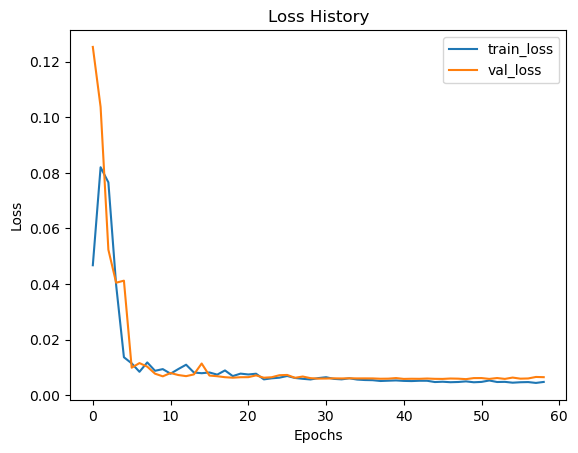

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

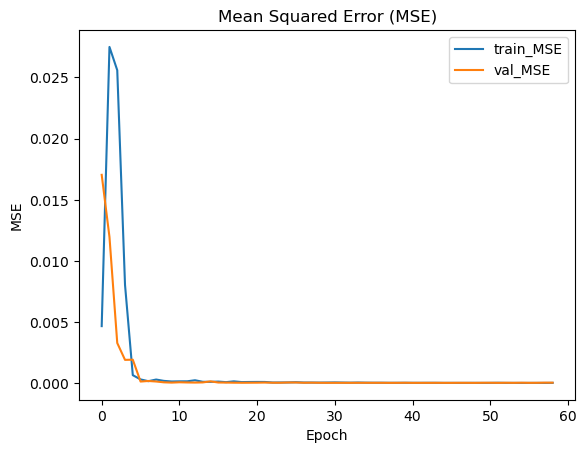

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

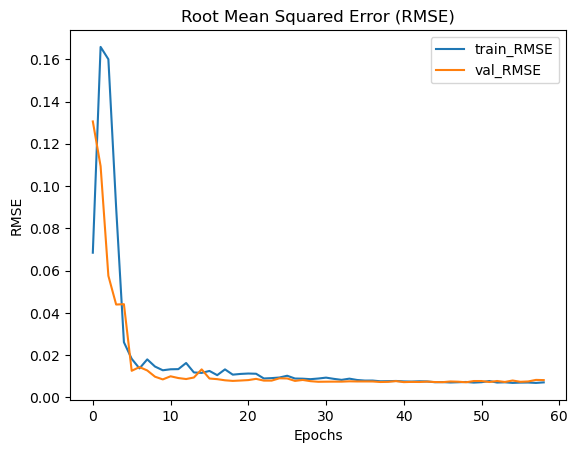

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

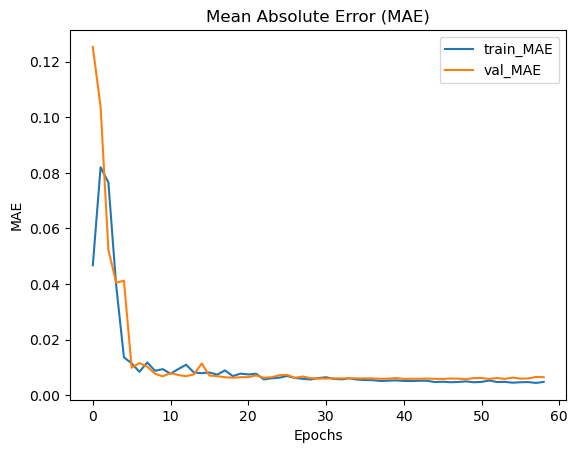

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

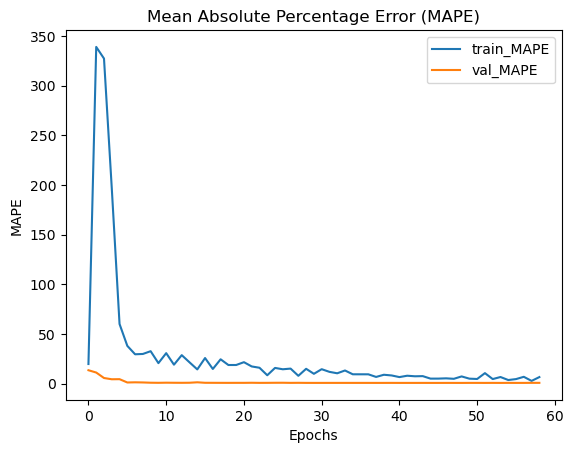

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:19:44.921560: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 5)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


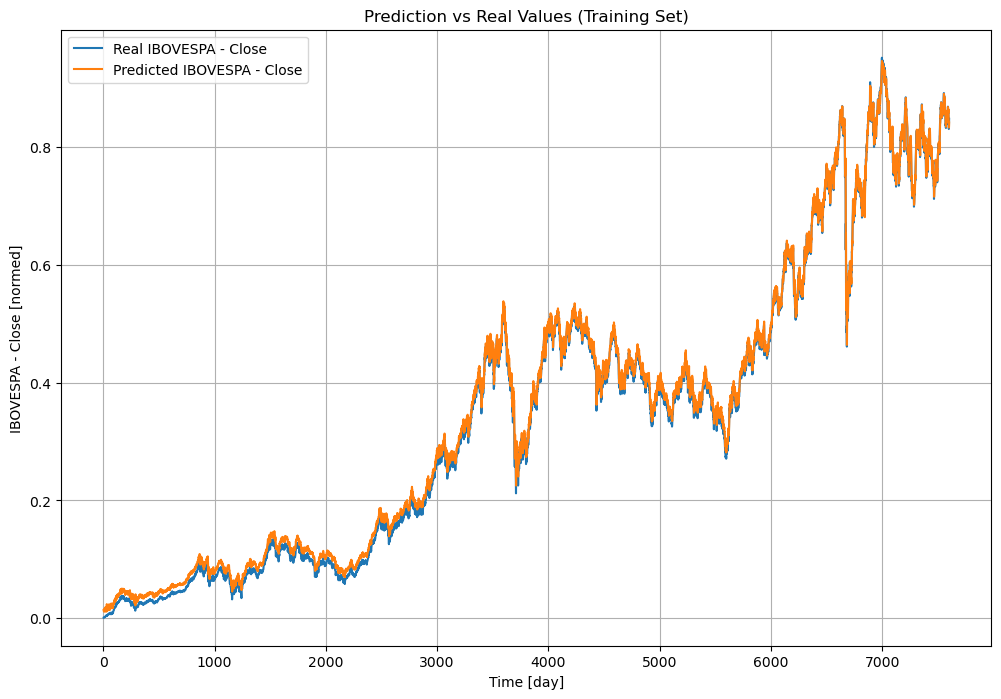

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 5)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


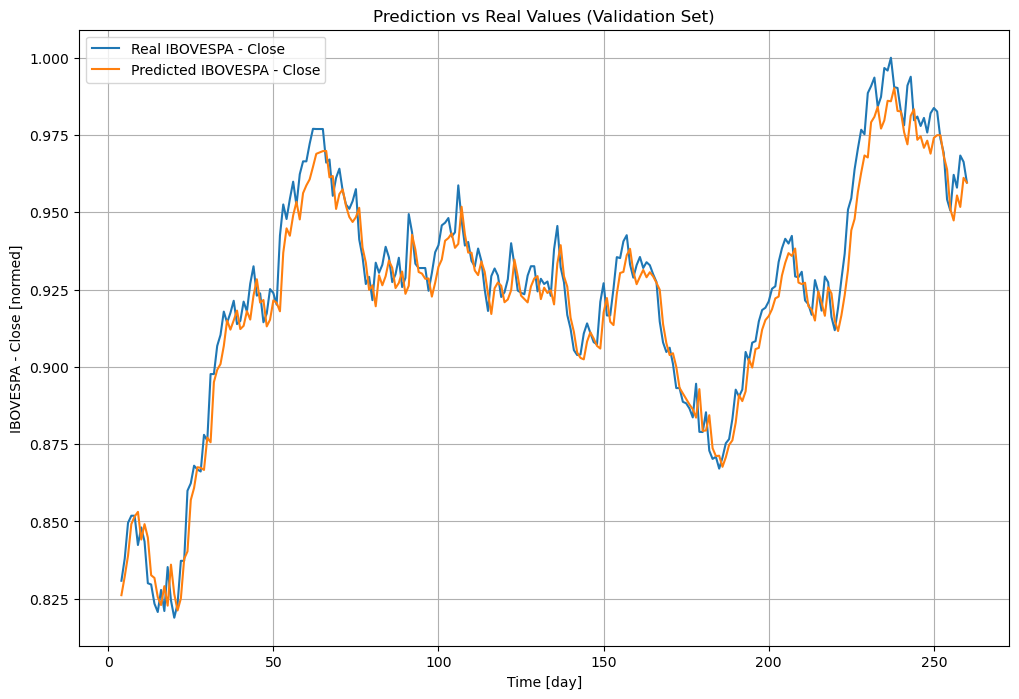

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 5)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


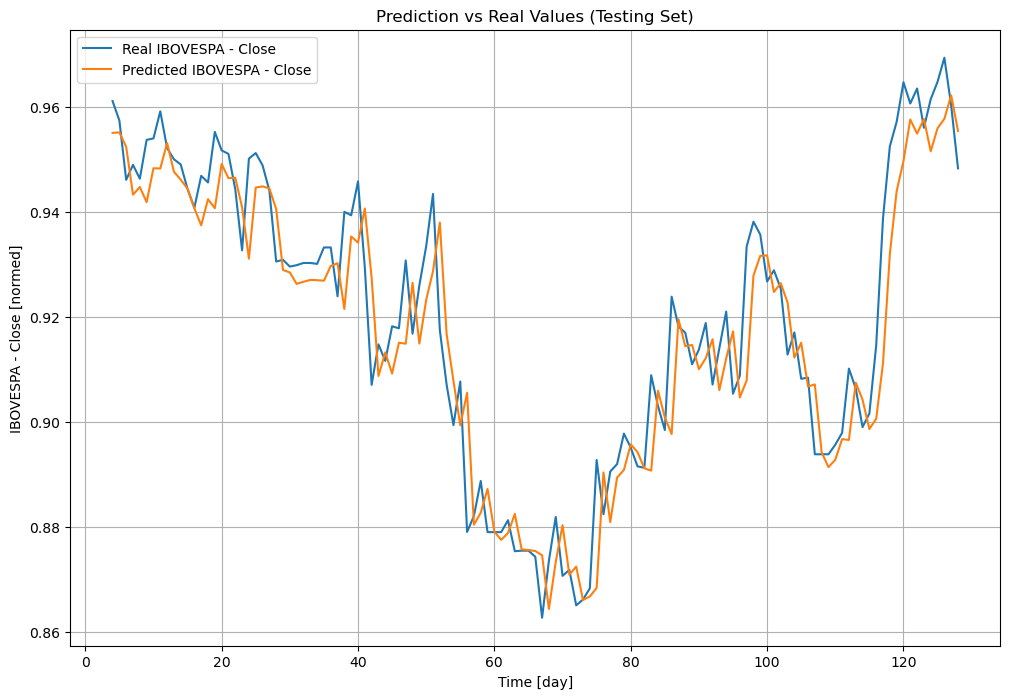

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

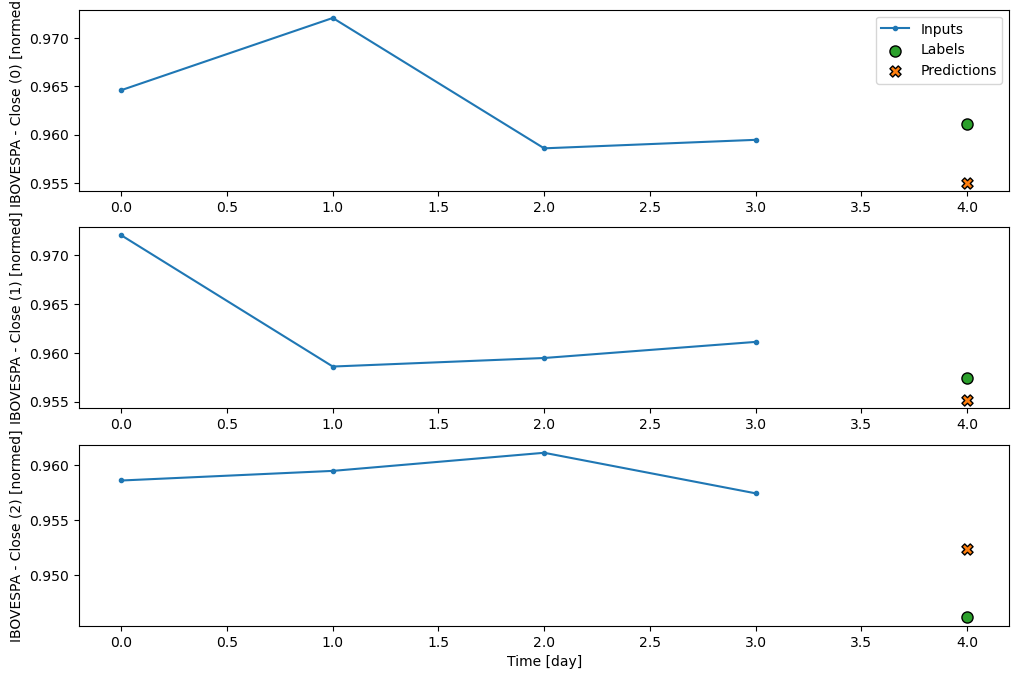

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:55s:384ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[[0.9550438 , 0.9550438 , 0.9550438 , ..., 0.9550438 ,
         0.9550438 , 0.9550438 ]],

       [[0.955147  , 0.955147  , 0.955147  , ..., 0.955147  ,
         0.955147  , 0.955147  ]],

       [[0.9523797 , 0.9523797 , 0.9523797 , ..., 0.9523797 ,
         0.9523797 , 0.9523797 ]],

       ...,

       [[0.95773935, 0.95773935, 0.95773935, ..., 0.95773935,
         0.95773935, 0.95773935]],

       [[0.96220064, 0.96220064, 0.96220064, ..., 0.96220064,
         0.96220064, 0.96220064]],

       [[0.9554131 , 0.9554131 , 0.9554131 , ..., 0.9554131 ,
         0.9554131 , 0.9554131 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')